---

#University of Stirling - Spring 2023

## ITNPAI1 - Deep Learning for Vision and NLP (2022/3)

---

# Assignment Summary

In this activity, you are required to apply the knowledge acquired in this module through the design and development of a complete project for deep learning-based image pattern recognition in an application to be defined by yourself. For this, you will need to perform the following **mandatory** steps:

1. [Problem definition](#scrollTo=hglJVRRslqMn)
2. [GitHub repository](#scrollTo=ecxDhkV9qmUf)
3. [Dataset](#scrollTo=qEgFzxmWrGA9)
4. [Dataloader](#scrollTo=EDd6lLwlx4un)
5. [Proposed solution](#scrollTo=ScTrpUW8zOp4)
6. [Experimental tests and evaluations](#scrollTo=3RBW58of0ZDo)
7. [Quiz and Report](#scrollTo=ws14iV4Dp_vf)
8. [Demonstration session](#scrollTo=ShLJrPKT4SQp)


---

# 1. **Problem definition** 


You must choose a computer vision task (classification, detection, semantic segmentation, captioning, geotagging, etc) to be modeled from images collected in the context of two different cities (A and B).
 - If the work is being carried out in pairs, **cities A and B must be the hometowns of each student**. In the case of individual work, city A must be your hometown and city B must be Stirling (or Edinburgh, if needed).
 - The standard project recommendation is to focus on recognizing cars or trees, which are easier to identify and annotate. Other objects or phenomena can be adopted, but are subject to prior approval by the module instructor (Jefersson A. dos Santos). **It is not allowed to assemble datasets containing people. Other sensitive patterns, such as license plates, must be properly hidden.**
 - Don't panic! We are aware that acquiring images _in situ_ is an impediment for most students. The dataset can be assembled with images collected remotely or from public repositories. Just be careful with rights and permissions for using images found on the internet. Anyway, these factors must be taken into account for the problem definition.
 - Think of interesting problems, but that are easy to assemble an image dataset. Although we encourage you to do interesting and engaging work, it shouldn't be too complex or time-consuming. Try to appropriately scale the time required for this step. Ask the instructors for advice, if necessary.

[top](#scrollTo=4i5afvUbhmGo)
 

---
# 2. **GitHub repository**

Give your project a name, create a private [GitHub repository](https://github.com/) with the name [Module Code] + [Project Name] and give access to the module instructors. Create a cover page with a description of your project. This empty notebook must be uploaded in the repository as well as the created dataset. The checkpoint date to perform this task will be two weeks after the publication of this notebook. 
This notebook should be updated and committed to the repository according to the checkpoint dates.
The repository's update history will be used as a criterion for monitoring and evaluating the work.
**Check the videos provided in the extra section on Canvas for more details on how to create your GitHub repository.**

[top](#scrollTo=4i5afvUbhmGo)

---
# 3. **Dataset creation**

You must collect a minimum of **200 positive samples** from the study objects for each city (A and B). 
Note that, depending on the task being solved, it will also be necessary to: 

   (i) collect more samples - negative ones, for instance;

   (ii) annotating each image, delineating objects or creating bounding boxes. Planning and executing this correctly is important to ensure effective training of deep learning-based models.

Your dataset can be assembled from one or more of the following ways:

  - *M1* - Pictures taken by yourself on site (street view from cities A and B), with attention to anonymization issues (if it is the case). It is not allowed to assemble datasets containing people. Other sensitive patterns, such as license plates, must be properly hidden.

  - *M2* - Aerial satellite/drone images obtained from GIS and remote sensing platforms or public repositories. Be careful with unusual file formats that may be challenging to manipulate using basic image processing libraries. We recommend keeping or converting the images to jpg or png.

  - *M3* - Pictures taken from other public available datasets. Remember you are not allowed to use datasets containing people or other sensitive patterns/objects.

  - *M4* - Images crawled from the internet as a whole (social networks, webpages, etc), with special attention to use and copyrights.

  - *M5* - Textual and metadata you may need in your project, with special attention to use and copyrights (as always!).

**Important:** If you collect the images on your own or from aerial imagery repositories, it will be necessary to keep the geographic coordinates. If you collect from specific websites, please retain the source links. This information should be placed in a .csv file and made available along with the final dataset.

[top](#scrollTo=4i5afvUbhmGo)

---

# 4. **Dataloader**

Here you are required to implement all the code related to pre-processing, cleaning, de-noising and preparing the input images and metadata according to the necessary data structures as input to your pattern recognition module. We recommend using [PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) or [Tensorflow (with Keras)](https://keras.io/getting_started/intro_to_keras_for_engineers/) as a base, but you are free to use any library or platform as long as it is well justified in the [final report](#scrollTo=ws14iV4Dp_vf).

[top](scrollTo=4i5afvUbhmGo)

In [1]:
# Write your dataloader code here. Create more code cells if you find it necessary
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
Edinburgh_with_tree = os.listdir('/content/drive/MyDrive/qazi/data/DATA/Edingbruh/tree')
Edinburgh_without_tree=os.listdir('/content/drive/MyDrive/qazi/data/DATA/Edingbruh/non tree')
glasglow_with_tree=os.listdir('/content/drive/MyDrive/qazi/data/DATA/glasglow/tree')
glasglow_without_tree=os.listdir('/content/drive/MyDrive/qazi/data/DATA/glasglow/non tree')

In [4]:
print('Number of Edinburgh with mask images:', len(Edinburgh_with_tree))
print('Number of Edinburgh without mask images:', len(Edinburgh_without_tree))
print('Number of glasglow with mask images:', len(glasglow_with_tree))
print('Number of glasglow without mask images:', len(glasglow_without_tree))

Number of Edinburgh with mask images: 200
Number of Edinburgh without mask images: 200
Number of glasglow with mask images: 200
Number of glasglow without mask images: 200


In [5]:
import os
import cv2
import numpy as np

# Define the directories of the image files
edinburgh_with_tree_dir = '/content/drive/MyDrive/qazi/data/DATA/Edingbruh/tree/'
edinburgh_without_tree_dir = '/content/drive/MyDrive/qazi/data/DATA/Edingbruh/non tree/'
glasglow_with_tree_dir = '/content/drive/MyDrive/qazi/data/DATA/glasglow/tree/'
glasglow_without_tree_dir = '/content/drive/MyDrive/qazi/data/DATA/glasglow/non tree/'
E_data = []
g_data = []

# Define the function to preprocess each image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Apply noise reduction
    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    # Apply image filtering
    image = cv2.medianBlur(image, 3)

    # Adjust image contrast
    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 0  # Brightness control (0-100)
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    return image

# Iterate through each image file and apply the preprocessing function
for image_file in os.listdir(edinburgh_with_tree_dir):
    image_path = os.path.join(edinburgh_with_tree_dir, image_file)
    image = preprocess_image(image_path)
    # Resize the image to 128x128 pixels
    image = cv2.resize(image, (128, 128))
    E_data.append(image)

for image_file in os.listdir(edinburgh_without_tree_dir):
    image_path = os.path.join(edinburgh_without_tree_dir, image_file)
    image = preprocess_image(image_path)
    # Resize the image to 128x128 pixels
    image = cv2.resize(image, (128, 128))
    E_data.append(image)

for image_file in os.listdir(glasglow_with_tree_dir):
    image_path = os.path.join(glasglow_with_tree_dir, image_file)
    image = preprocess_image(image_path)
    # Resize the image to 128x128 pixels
    image = cv2.resize(image, (128, 128))
    g_data.append(image)

for image_file in os.listdir(glasglow_without_tree_dir):
    image_path = os.path.join(glasglow_without_tree_dir, image_file)
    image = preprocess_image(image_path)
    # Resize the image to 128x128 pixels
    image = cv2.resize(image, (128, 128))
    g_data.append(image)

In [6]:

# Convert the lists to numpy arrays
E_data = np.array(E_data)
g_data = np.array(g_data)


In [7]:
print(E_data.shape)


(400, 128, 128, 3)


In [8]:
# create the labels

E_with_tree_labels = [1]*200

E_without_tree_labels = [0]*200

g_with_tree_labels = [1]*200

g_without_tree_labels = [0]*200

In [9]:
E_labels = E_with_tree_labels + E_without_tree_labels
g_labels = g_with_tree_labels + g_without_tree_labels

In [10]:
E_X = np.array(E_data)
E_Y = np.array(E_labels)
g_X = np.array(g_data)
g_Y = np.array(g_labels)

In [11]:
E_X.shape


(400, 128, 128, 3)

In [12]:
type(E_X)
type(E_Y)

numpy.ndarray

---

# 5. **Proposed solution** 

This is where you should implement most of the code for your solution. Write the routines for training and predicting the models and any necessary intermediate steps. Post-processing functions must also be implemented here.

  - Use good programming practices, modularizing and adequately commenting on your code. Code quality will be considered in the final assessment.
Again, we recommend using [PyTorch](https://pytorch.org/tutorials/beginner/introyt.html), but you are free to use any library or platform. You just need to justify that in the [final report](#scrollTo=ws14iV4Dp_vf).

  - You can use pre-trained models as backbones or any code available on the web as a basis, but they must be correctly credited and referenced both in this notebook and in the final report. Cite the source link repository and explicitly cite the authors of it.
If you changed existing code, make it clear what the changes were.
Make it clear where your own code starts and where it ends. Note that the originality percentage of the code will be considered in the evaluation, so use external codes wisely and sparingly. **Missconduct alert:** remember that there are many tools that compare existing source code and that it is relatively easy to identify authorship. So, be careful and fair by always properly thanking the authors if you use external code.

[top](#scrollTo=4i5afvUbhmGo)

**Building CNN**

In [13]:
# Write your proposed solution code here. Create more code cells if you find it necessary
import tensorflow as tf
from tensorflow import keras


In [14]:
# Creating model structure here
def create_model(learning_rate, batch_size):
    num_of_classes = 2

    model = keras.Sequential()

    model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


    model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))


    model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))
    
    return model


for hyper parameter tuning


---

# 6. **Experimental tests and evaluations** 


Here you must implement your code for training, testing and evaluating your solution. For this, the following code blocks (*E1*, *E2*, and *E3*) are mandatory:

  - *E1* - Training the models. Implement code to call the dataloaders implemented for training your models.  Make routines to test different parameters of your models. Plot graphs that illustrate how parameters impact model training. Compare. Train and select a model for each city (A and B) and justify. You should use half (50%) of the samples from each dataset for training and leave the other half for testing (50%). 

[top](#scrollTo=4i5afvUbhmGo)

In [15]:
# Write your codes for E1 here. Create more code cells if needed
# Split Edinburgh data into training and testing sets

EX_train, EX_test, EY_train, EY_test = train_test_split(E_X, E_Y, test_size=0.5, random_state=42)

# Split Glasgow data into training and testing sets
gX_train, gX_test, gY_train, gY_test = train_test_split(g_X, g_Y, test_size=0.5, random_state=42)



Epoch 1/10
5/5 [==============================] - 12s 91ms/step - loss: 222.3776 - accuracy: 0.5500 - val_loss: 89.7788 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 105.5005 - accuracy: 0.5813 - val_loss: 6.4741 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 15.4150 - accuracy: 0.7250 - val_loss: 2.6118 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 2.3037 - accuracy: 0.8625 - val_loss: 0.9326 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 0.7394 - accuracy: 0.9312 - val_loss: 0.2298 - val_accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 0s 28ms/step - loss: 0.2606 - accuracy: 0.9125 - val_loss: 0.1793 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 27ms/step - loss: 0.2607 - accuracy: 0.9500 - val_loss: 0.1869 - val_accuracy: 0.9000
Epoch 8/10
5/5 [====

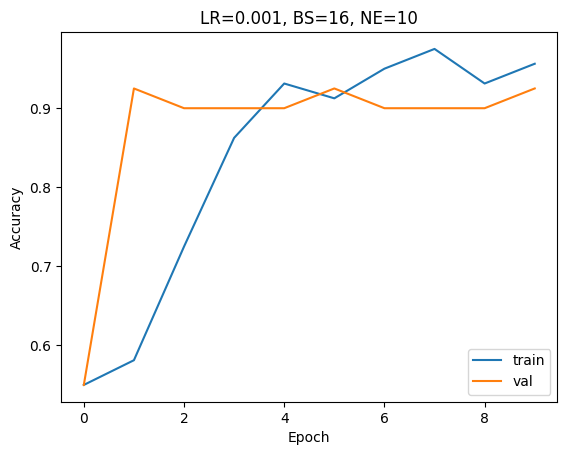

Epoch 1/20
5/5 [==============================] - 2s 64ms/step - loss: 315.1085 - accuracy: 0.5250 - val_loss: 5.9124 - val_accuracy: 0.8250
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 49.3914 - accuracy: 0.7125 - val_loss: 2.0051 - val_accuracy: 0.9500
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 6.3111 - accuracy: 0.8687 - val_loss: 0.5165 - val_accuracy: 0.9250
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 1.3363 - accuracy: 0.9125 - val_loss: 1.2849 - val_accuracy: 0.7750
Epoch 5/20
5/5 [==============================] - 0s 26ms/step - loss: 0.4921 - accuracy: 0.8875 - val_loss: 0.4228 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 23ms/step - loss: 0.5302 - accuracy: 0.8938 - val_loss: 0.3739 - val_accuracy: 0.9250
Epoch 7/20
5/5 [==============================] - 0s 24ms/step - loss: 0.3336 - accuracy: 0.9125 - val_loss: 0.8359 - val_accuracy: 0.8000
Epoch 8/20
5/5 [========

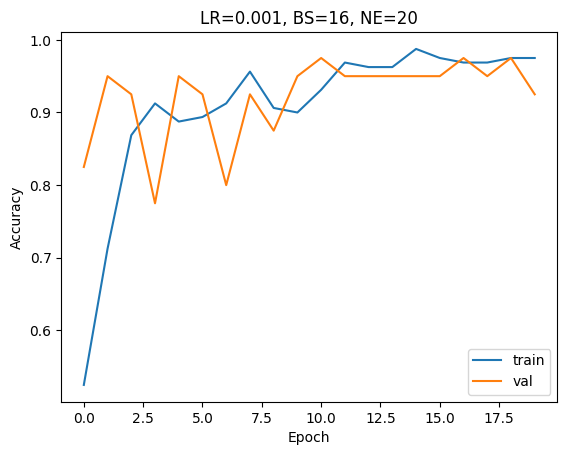

Epoch 1/30
5/5 [==============================] - 2s 66ms/step - loss: 418.8906 - accuracy: 0.4688 - val_loss: 4.7488 - val_accuracy: 0.7000
Epoch 2/30
5/5 [==============================] - 0s 26ms/step - loss: 78.9733 - accuracy: 0.5375 - val_loss: 0.8758 - val_accuracy: 0.9750
Epoch 3/30
5/5 [==============================] - 0s 27ms/step - loss: 7.4440 - accuracy: 0.6938 - val_loss: 0.1940 - val_accuracy: 0.9750
Epoch 4/30
5/5 [==============================] - 0s 24ms/step - loss: 1.9289 - accuracy: 0.8062 - val_loss: 0.9985 - val_accuracy: 0.7250
Epoch 5/30
5/5 [==============================] - 0s 27ms/step - loss: 0.7287 - accuracy: 0.7812 - val_loss: 0.6841 - val_accuracy: 0.7500
Epoch 6/30
5/5 [==============================] - 0s 24ms/step - loss: 0.4489 - accuracy: 0.9062 - val_loss: 0.6004 - val_accuracy: 0.8000
Epoch 7/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4271 - accuracy: 0.9250 - val_loss: 0.6011 - val_accuracy: 0.8750
Epoch 8/30
5/5 [========

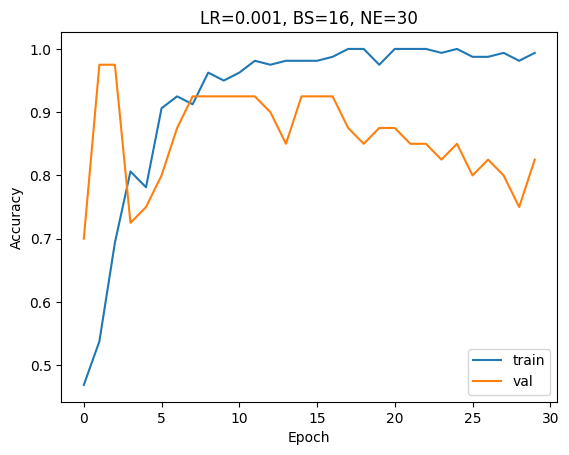

Epoch 1/10
5/5 [==============================] - 3s 67ms/step - loss: 244.6338 - accuracy: 0.5188 - val_loss: 1.4902 - val_accuracy: 0.9250
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 37.4006 - accuracy: 0.7125 - val_loss: 4.8882 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 8.0617 - accuracy: 0.7937 - val_loss: 1.4562 - val_accuracy: 0.8500
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 2.3091 - accuracy: 0.8500 - val_loss: 1.5666 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 0s 24ms/step - loss: 1.1089 - accuracy: 0.9375 - val_loss: 0.4759 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4754 - accuracy: 0.9375 - val_loss: 0.4683 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.2662 - accuracy: 0.9375 - val_loss: 0.7691 - val_accuracy: 0.8250
Epoch 8/10
5/5 [========

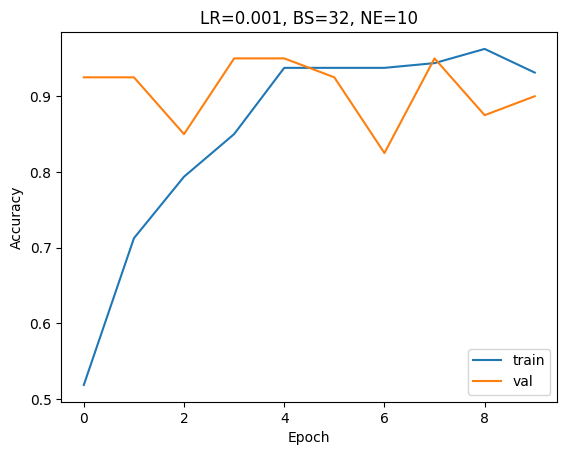

Epoch 1/20
5/5 [==============================] - 2s 65ms/step - loss: 329.7429 - accuracy: 0.5562 - val_loss: 32.5891 - val_accuracy: 0.5750
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 117.9157 - accuracy: 0.5875 - val_loss: 4.9888 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 27ms/step - loss: 13.4731 - accuracy: 0.7500 - val_loss: 1.2555 - val_accuracy: 0.9250
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 1.2660 - accuracy: 0.8500 - val_loss: 1.4215 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 0s 26ms/step - loss: 0.6425 - accuracy: 0.9062 - val_loss: 0.6440 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 0.3576 - accuracy: 0.9375 - val_loss: 0.5975 - val_accuracy: 0.9250
Epoch 7/20
5/5 [==============================] - 0s 25ms/step - loss: 0.3745 - accuracy: 0.9312 - val_loss: 0.6862 - val_accuracy: 0.9000
Epoch 8/20
5/5 [=====

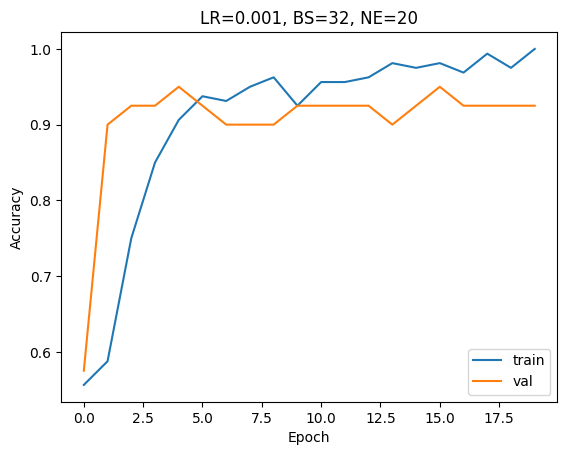

Epoch 1/30
5/5 [==============================] - 2s 83ms/step - loss: 261.0923 - accuracy: 0.4938 - val_loss: 91.0773 - val_accuracy: 0.4500
Epoch 2/30
5/5 [==============================] - 0s 29ms/step - loss: 56.4608 - accuracy: 0.5437 - val_loss: 0.2307 - val_accuracy: 0.8750
Epoch 3/30
5/5 [==============================] - 0s 28ms/step - loss: 1.4809 - accuracy: 0.7063 - val_loss: 0.9063 - val_accuracy: 0.7000
Epoch 4/30
5/5 [==============================] - 0s 27ms/step - loss: 0.5945 - accuracy: 0.8062 - val_loss: 0.5540 - val_accuracy: 0.8500
Epoch 5/30
5/5 [==============================] - 0s 28ms/step - loss: 0.4701 - accuracy: 0.9125 - val_loss: 0.4742 - val_accuracy: 0.8750
Epoch 6/30
5/5 [==============================] - 0s 27ms/step - loss: 0.5394 - accuracy: 0.8813 - val_loss: 0.4728 - val_accuracy: 0.7000
Epoch 7/30
5/5 [==============================] - 0s 26ms/step - loss: 0.4206 - accuracy: 0.9500 - val_loss: 0.4454 - val_accuracy: 0.9500
Epoch 8/30
5/5 [=======

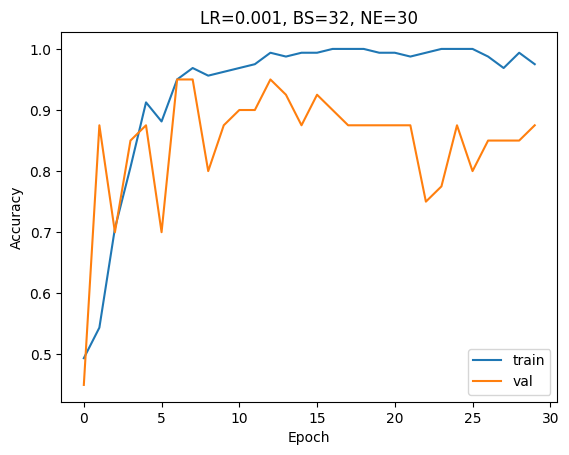

Epoch 1/10
5/5 [==============================] - 2s 66ms/step - loss: 224.7247 - accuracy: 0.5063 - val_loss: 8.2621 - val_accuracy: 0.8250
Epoch 2/10
5/5 [==============================] - 0s 26ms/step - loss: 99.0178 - accuracy: 0.5562 - val_loss: 2.2745 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 26ms/step - loss: 15.2572 - accuracy: 0.7875 - val_loss: 0.8357 - val_accuracy: 0.9500
Epoch 4/10
5/5 [==============================] - 0s 23ms/step - loss: 5.6507 - accuracy: 0.8375 - val_loss: 2.7794 - val_accuracy: 0.8500
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 1.7367 - accuracy: 0.8375 - val_loss: 0.6703 - val_accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.8754 - accuracy: 0.9312 - val_loss: 0.7410 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.8080 - accuracy: 0.9000 - val_loss: 0.5728 - val_accuracy: 0.9500
Epoch 8/10
5/5 [=======

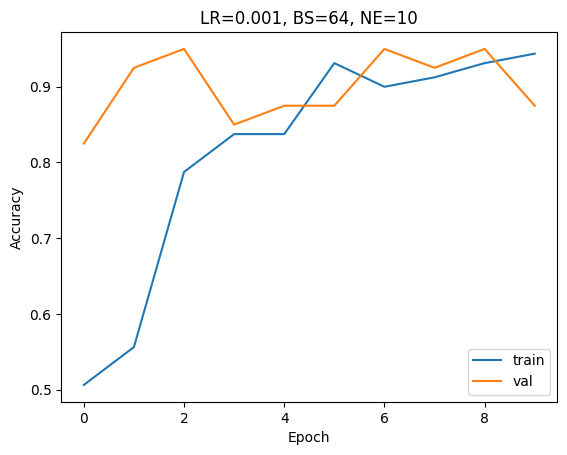

Epoch 1/20
5/5 [==============================] - 3s 86ms/step - loss: 374.0171 - accuracy: 0.5375 - val_loss: 74.1505 - val_accuracy: 0.5500
Epoch 2/20
5/5 [==============================] - 0s 30ms/step - loss: 37.0962 - accuracy: 0.6375 - val_loss: 2.3835 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 30ms/step - loss: 7.0439 - accuracy: 0.7625 - val_loss: 1.5959 - val_accuracy: 0.9000
Epoch 4/20
5/5 [==============================] - 0s 31ms/step - loss: 3.9703 - accuracy: 0.7937 - val_loss: 3.6140 - val_accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 0s 29ms/step - loss: 1.9489 - accuracy: 0.8062 - val_loss: 1.6240 - val_accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 0s 27ms/step - loss: 0.5725 - accuracy: 0.8375 - val_loss: 0.4867 - val_accuracy: 0.9250
Epoch 7/20
5/5 [==============================] - 0s 26ms/step - loss: 0.6490 - accuracy: 0.8188 - val_loss: 0.5670 - val_accuracy: 0.8500
Epoch 8/20
5/5 [=======

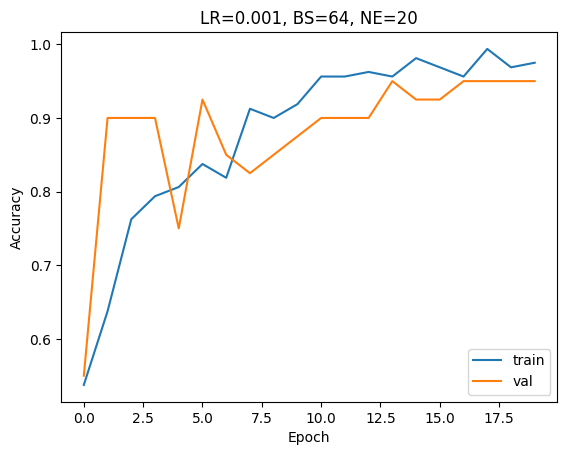

Epoch 1/30
5/5 [==============================] - 2s 67ms/step - loss: 148.0791 - accuracy: 0.4938 - val_loss: 9.1256 - val_accuracy: 0.5500
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 60.1217 - accuracy: 0.5437 - val_loss: 0.2469 - val_accuracy: 0.9250
Epoch 3/30
5/5 [==============================] - 0s 28ms/step - loss: 2.6905 - accuracy: 0.7812 - val_loss: 0.4867 - val_accuracy: 0.8250
Epoch 4/30
5/5 [==============================] - 0s 25ms/step - loss: 0.6405 - accuracy: 0.8500 - val_loss: 0.7745 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 0s 23ms/step - loss: 0.7679 - accuracy: 0.8562 - val_loss: 0.4235 - val_accuracy: 0.7750
Epoch 6/30
5/5 [==============================] - 0s 28ms/step - loss: 0.4485 - accuracy: 0.8687 - val_loss: 0.5095 - val_accuracy: 0.8000
Epoch 7/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4581 - accuracy: 0.8938 - val_loss: 0.5164 - val_accuracy: 0.8000
Epoch 8/30
5/5 [========

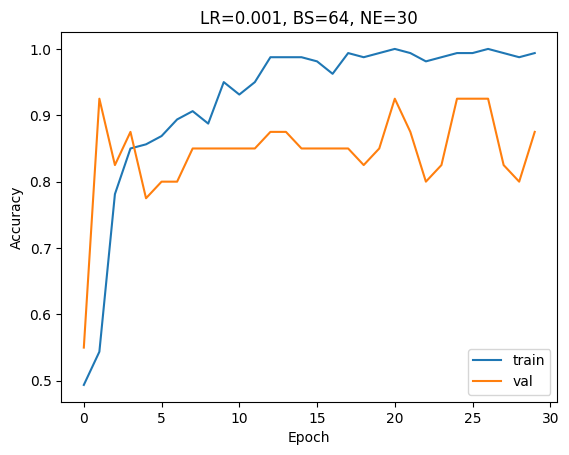

Epoch 1/10
5/5 [==============================] - 2s 89ms/step - loss: 203.5246 - accuracy: 0.5312 - val_loss: 2.2657 - val_accuracy: 0.9000
Epoch 2/10
5/5 [==============================] - 0s 33ms/step - loss: 44.9341 - accuracy: 0.6313 - val_loss: 0.4592 - val_accuracy: 0.9500
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 3.3573 - accuracy: 0.8000 - val_loss: 0.5389 - val_accuracy: 0.8750
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.8153 - accuracy: 0.8125 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 32ms/step - loss: 0.3847 - accuracy: 0.9187 - val_loss: 0.3419 - val_accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4120 - accuracy: 0.9500 - val_loss: 0.2993 - val_accuracy: 0.9000
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 0.4257 - accuracy: 0.9375 - val_loss: 0.3036 - val_accuracy: 0.9000
Epoch 8/10
5/5 [========

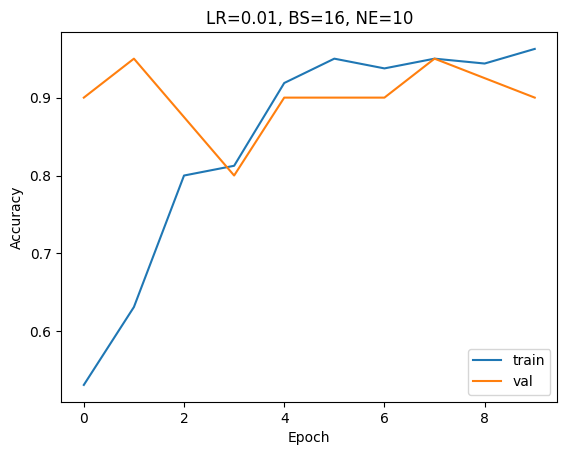

Epoch 1/20
5/5 [==============================] - 2s 65ms/step - loss: 178.4514 - accuracy: 0.5562 - val_loss: 43.3482 - val_accuracy: 0.7500
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 76.0237 - accuracy: 0.7063 - val_loss: 22.7382 - val_accuracy: 0.8000
Epoch 3/20
5/5 [==============================] - 0s 31ms/step - loss: 12.5078 - accuracy: 0.8375 - val_loss: 2.2766 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 5.0508 - accuracy: 0.9000 - val_loss: 1.2655 - val_accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 0s 23ms/step - loss: 2.1056 - accuracy: 0.9312 - val_loss: 0.9666 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 1.5479 - accuracy: 0.9125 - val_loss: 0.8494 - val_accuracy: 0.9500
Epoch 7/20
5/5 [==============================] - 0s 21ms/step - loss: 1.1519 - accuracy: 0.9438 - val_loss: 0.6252 - val_accuracy: 0.9500
Epoch 8/20
5/5 [=====

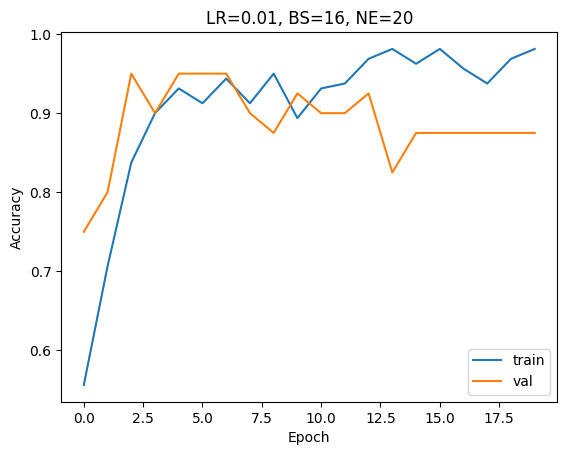

Epoch 1/30
5/5 [==============================] - 2s 65ms/step - loss: 131.6607 - accuracy: 0.5938 - val_loss: 23.5635 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 36.2270 - accuracy: 0.5875 - val_loss: 0.8056 - val_accuracy: 0.8750
Epoch 3/30
5/5 [==============================] - 0s 26ms/step - loss: 2.1299 - accuracy: 0.7812 - val_loss: 0.6192 - val_accuracy: 0.7000
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 0.5250 - accuracy: 0.8250 - val_loss: 0.4580 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 0s 28ms/step - loss: 0.4604 - accuracy: 0.9125 - val_loss: 0.4798 - val_accuracy: 0.8750
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 0.4869 - accuracy: 0.9062 - val_loss: 0.4968 - val_accuracy: 0.7750
Epoch 7/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4385 - accuracy: 0.8875 - val_loss: 0.6421 - val_accuracy: 0.7500
Epoch 8/30
5/5 [=======

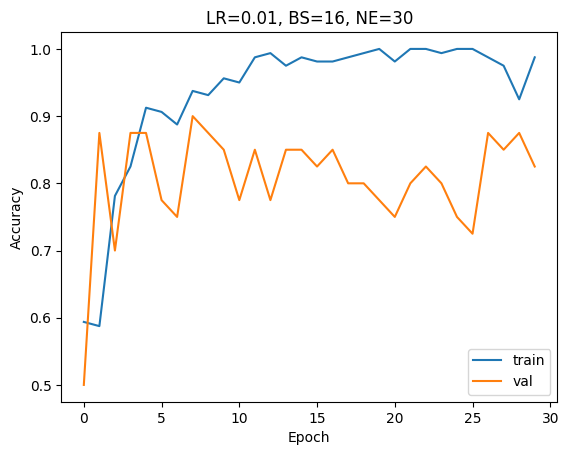

Epoch 1/10
5/5 [==============================] - 2s 62ms/step - loss: 215.0190 - accuracy: 0.4875 - val_loss: 20.0618 - val_accuracy: 0.7000
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 73.9416 - accuracy: 0.6500 - val_loss: 2.8982 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 27ms/step - loss: 9.9966 - accuracy: 0.7750 - val_loss: 1.6720 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 1.5693 - accuracy: 0.9187 - val_loss: 2.8215 - val_accuracy: 0.8750
Epoch 5/10
5/5 [==============================] - 0s 28ms/step - loss: 1.4597 - accuracy: 0.9000 - val_loss: 1.2691 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 1.1076 - accuracy: 0.9000 - val_loss: 0.9886 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.9871 - accuracy: 0.9125 - val_loss: 1.4848 - val_accuracy: 0.8250
Epoch 8/10
5/5 [=======

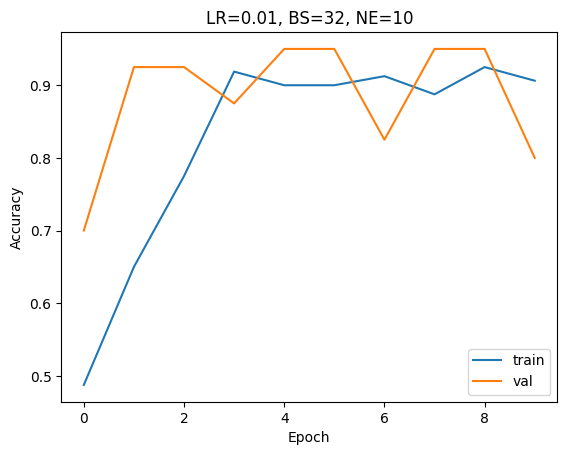

Epoch 1/20
5/5 [==============================] - 2s 63ms/step - loss: 132.4800 - accuracy: 0.4688 - val_loss: 0.1299 - val_accuracy: 0.9500
Epoch 2/20
5/5 [==============================] - 0s 32ms/step - loss: 13.3151 - accuracy: 0.7437 - val_loss: 2.7712 - val_accuracy: 0.6500
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 0.8568 - accuracy: 0.8062 - val_loss: 3.7296 - val_accuracy: 0.7000
Epoch 4/20
5/5 [==============================] - 0s 25ms/step - loss: 2.3378 - accuracy: 0.7563 - val_loss: 1.6244 - val_accuracy: 0.6000
Epoch 5/20
5/5 [==============================] - 0s 26ms/step - loss: 1.0842 - accuracy: 0.7688 - val_loss: 0.7612 - val_accuracy: 0.7250
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 0.5553 - accuracy: 0.8875 - val_loss: 0.5463 - val_accuracy: 0.8250
Epoch 7/20
5/5 [==============================] - 0s 25ms/step - loss: 0.4928 - accuracy: 0.8875 - val_loss: 0.5119 - val_accuracy: 0.8500
Epoch 8/20
5/5 [========

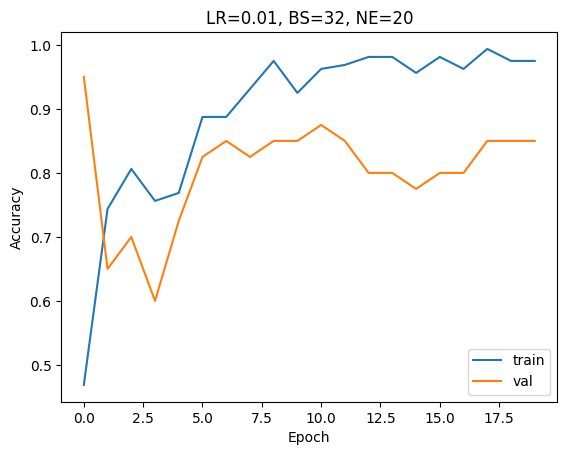

Epoch 1/30
5/5 [==============================] - 2s 89ms/step - loss: 181.1531 - accuracy: 0.4875 - val_loss: 1.8890 - val_accuracy: 0.9250
Epoch 2/30
5/5 [==============================] - 0s 31ms/step - loss: 53.3676 - accuracy: 0.6062 - val_loss: 2.6059 - val_accuracy: 0.9250
Epoch 3/30
5/5 [==============================] - 0s 32ms/step - loss: 7.9269 - accuracy: 0.7875 - val_loss: 1.2143 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 0s 31ms/step - loss: 3.5517 - accuracy: 0.8375 - val_loss: 0.2433 - val_accuracy: 0.9250
Epoch 5/30
5/5 [==============================] - 0s 32ms/step - loss: 1.6519 - accuracy: 0.8875 - val_loss: 0.1226 - val_accuracy: 0.9500
Epoch 6/30
5/5 [==============================] - 0s 31ms/step - loss: 0.8660 - accuracy: 0.8250 - val_loss: 0.6940 - val_accuracy: 0.7250
Epoch 7/30
5/5 [==============================] - 0s 33ms/step - loss: 0.5590 - accuracy: 0.6875 - val_loss: 0.3969 - val_accuracy: 0.8500
Epoch 8/30
5/5 [========

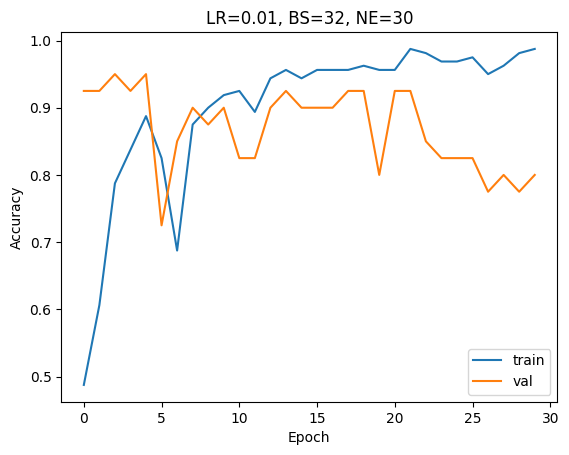

Epoch 1/10
5/5 [==============================] - 2s 67ms/step - loss: 400.8170 - accuracy: 0.4375 - val_loss: 80.2219 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 144.5102 - accuracy: 0.6375 - val_loss: 2.2714 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 26ms/step - loss: 10.3985 - accuracy: 0.7625 - val_loss: 0.8414 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 0s 25ms/step - loss: 1.0683 - accuracy: 0.9000 - val_loss: 0.7425 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 0.9287 - accuracy: 0.9250 - val_loss: 0.6410 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.4571 - accuracy: 0.9187 - val_loss: 0.4446 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 0s 24ms/step - loss: 0.3387 - accuracy: 0.9500 - val_loss: 0.4670 - val_accuracy: 0.9500
Epoch 8/10
5/5 [=====

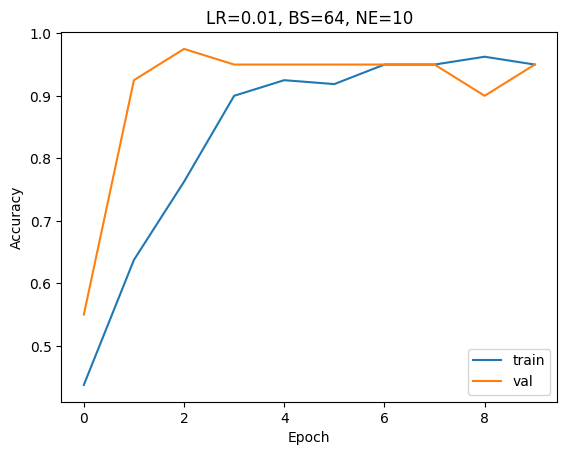

Epoch 1/20
5/5 [==============================] - 3s 88ms/step - loss: 293.6099 - accuracy: 0.5938 - val_loss: 48.0922 - val_accuracy: 0.7750
Epoch 2/20
5/5 [==============================] - 0s 32ms/step - loss: 57.9680 - accuracy: 0.7563 - val_loss: 18.8189 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 32ms/step - loss: 24.5708 - accuracy: 0.8875 - val_loss: 5.3624 - val_accuracy: 0.8750
Epoch 4/20
5/5 [==============================] - 0s 32ms/step - loss: 7.9831 - accuracy: 0.8687 - val_loss: 3.3316 - val_accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 0s 31ms/step - loss: 2.2607 - accuracy: 0.9187 - val_loss: 1.1348 - val_accuracy: 0.9750
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 1.7868 - accuracy: 0.9000 - val_loss: 0.4077 - val_accuracy: 0.9500
Epoch 7/20
5/5 [==============================] - 0s 23ms/step - loss: 0.4228 - accuracy: 0.9187 - val_loss: 0.4823 - val_accuracy: 0.9000
Epoch 8/20
5/5 [=====

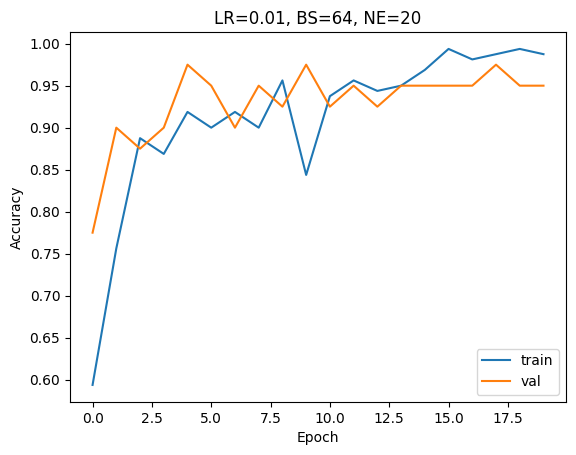

Epoch 1/30
5/5 [==============================] - 2s 71ms/step - loss: 314.9324 - accuracy: 0.4625 - val_loss: 1.3675 - val_accuracy: 0.9250
Epoch 2/30
5/5 [==============================] - 0s 28ms/step - loss: 50.1358 - accuracy: 0.6687 - val_loss: 3.1656 - val_accuracy: 0.7500
Epoch 3/30
5/5 [==============================] - 0s 27ms/step - loss: 2.9309 - accuracy: 0.7500 - val_loss: 0.8734 - val_accuracy: 0.9000
Epoch 4/30
5/5 [==============================] - 0s 27ms/step - loss: 1.5700 - accuracy: 0.8188 - val_loss: 0.5808 - val_accuracy: 0.9500
Epoch 5/30
5/5 [==============================] - 0s 23ms/step - loss: 0.6185 - accuracy: 0.9000 - val_loss: 0.5483 - val_accuracy: 0.9000
Epoch 6/30
5/5 [==============================] - 0s 23ms/step - loss: 0.5018 - accuracy: 0.9000 - val_loss: 0.4389 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 0s 24ms/step - loss: 0.2508 - accuracy: 0.9500 - val_loss: 0.3468 - val_accuracy: 0.9250
Epoch 8/30
5/5 [========

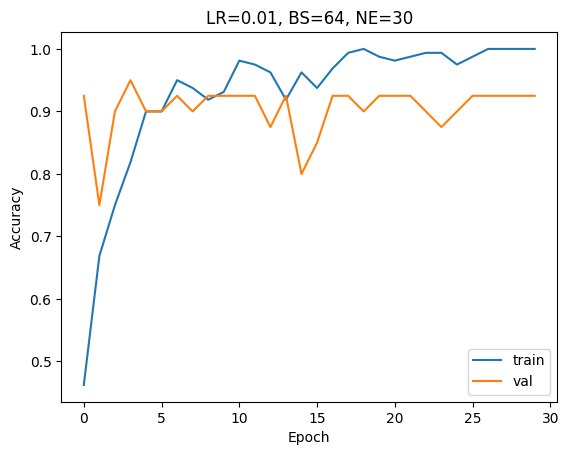

Epoch 1/10
5/5 [==============================] - 3s 86ms/step - loss: 209.5527 - accuracy: 0.5875 - val_loss: 2.8403 - val_accuracy: 0.9000
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 50.8443 - accuracy: 0.5625 - val_loss: 2.2103 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 0s 33ms/step - loss: 5.3474 - accuracy: 0.8125 - val_loss: 0.9305 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 2.1253 - accuracy: 0.8188 - val_loss: 0.3059 - val_accuracy: 0.9250
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 0.7726 - accuracy: 0.8562 - val_loss: 0.8148 - val_accuracy: 0.6750
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.6944 - accuracy: 0.8500 - val_loss: 0.4799 - val_accuracy: 0.7250
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 0.4670 - accuracy: 0.8938 - val_loss: 0.4023 - val_accuracy: 0.8250
Epoch 8/10
5/5 [========

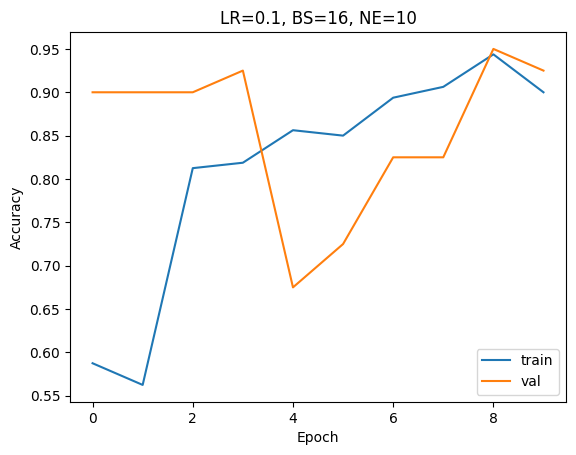

Epoch 1/20
5/5 [==============================] - 2s 68ms/step - loss: 167.7432 - accuracy: 0.5688 - val_loss: 4.3046 - val_accuracy: 0.9250
Epoch 2/20
5/5 [==============================] - 0s 28ms/step - loss: 19.4117 - accuracy: 0.7812 - val_loss: 2.9065 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 27ms/step - loss: 2.1269 - accuracy: 0.8938 - val_loss: 0.4818 - val_accuracy: 0.9750
Epoch 4/20
5/5 [==============================] - 0s 26ms/step - loss: 2.1497 - accuracy: 0.9000 - val_loss: 0.4733 - val_accuracy: 0.9750
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 0.5183 - accuracy: 0.9375 - val_loss: 1.1182 - val_accuracy: 0.8000
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 0.5699 - accuracy: 0.8938 - val_loss: 0.4342 - val_accuracy: 0.9500
Epoch 7/20
5/5 [==============================] - 0s 24ms/step - loss: 0.2309 - accuracy: 0.9500 - val_loss: 0.3343 - val_accuracy: 0.9500
Epoch 8/20
5/5 [========

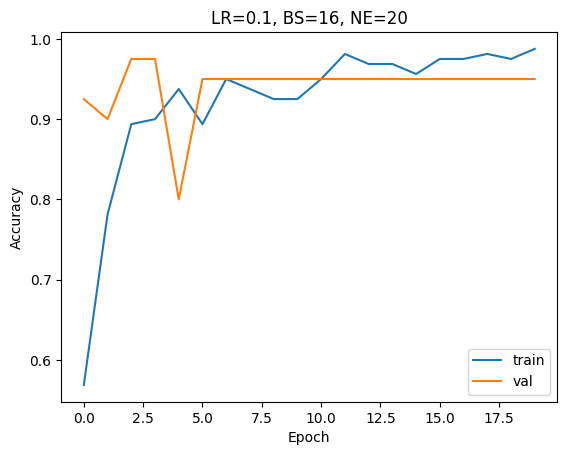

Epoch 1/30
5/5 [==============================] - 2s 67ms/step - loss: 304.1270 - accuracy: 0.5437 - val_loss: 2.4627 - val_accuracy: 0.9000
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 108.7317 - accuracy: 0.5875 - val_loss: 14.8469 - val_accuracy: 0.7250
Epoch 3/30
5/5 [==============================] - 0s 30ms/step - loss: 19.3844 - accuracy: 0.7312 - val_loss: 0.3365 - val_accuracy: 0.9250
Epoch 4/30
5/5 [==============================] - 0s 29ms/step - loss: 1.1021 - accuracy: 0.8562 - val_loss: 0.6406 - val_accuracy: 0.8250
Epoch 5/30
5/5 [==============================] - 0s 26ms/step - loss: 0.8014 - accuracy: 0.8188 - val_loss: 0.4564 - val_accuracy: 0.7750
Epoch 6/30
5/5 [==============================] - 0s 30ms/step - loss: 0.7582 - accuracy: 0.7937 - val_loss: 0.6521 - val_accuracy: 0.7000
Epoch 7/30
5/5 [==============================] - 0s 24ms/step - loss: 0.6225 - accuracy: 0.8750 - val_loss: 0.4142 - val_accuracy: 0.7500
Epoch 8/30
5/5 [=====

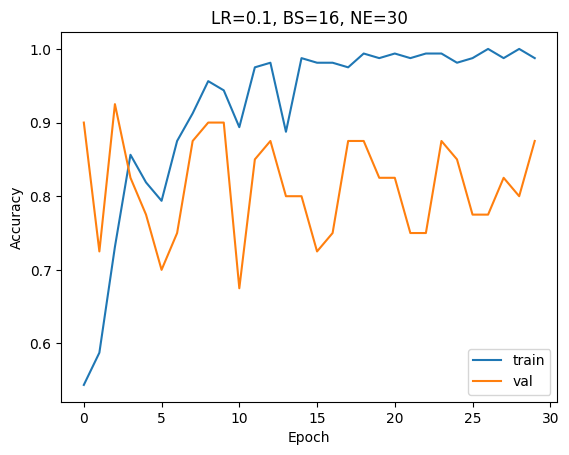

Epoch 1/10
5/5 [==============================] - 2s 67ms/step - loss: 386.3118 - accuracy: 0.4875 - val_loss: 44.7820 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 0s 28ms/step - loss: 79.9094 - accuracy: 0.5938 - val_loss: 4.7366 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 8.8258 - accuracy: 0.8438 - val_loss: 3.1308 - val_accuracy: 0.8750
Epoch 4/10
5/5 [==============================] - 0s 26ms/step - loss: 6.0696 - accuracy: 0.8750 - val_loss: 3.4259 - val_accuracy: 0.8750
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 4.4613 - accuracy: 0.8500 - val_loss: 1.4707 - val_accuracy: 0.9250
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 3.1642 - accuracy: 0.8750 - val_loss: 0.9250 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 26ms/step - loss: 0.5391 - accuracy: 0.9375 - val_loss: 0.6975 - val_accuracy: 0.8750
Epoch 8/10
5/5 [=======

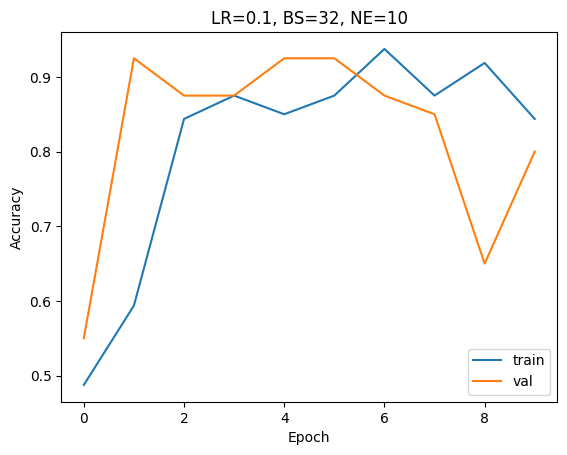

Epoch 1/20
5/5 [==============================] - 2s 63ms/step - loss: 142.4396 - accuracy: 0.4875 - val_loss: 5.1625 - val_accuracy: 0.6250
Epoch 2/20
5/5 [==============================] - 0s 29ms/step - loss: 18.8088 - accuracy: 0.6875 - val_loss: 5.0558 - val_accuracy: 0.6750
Epoch 3/20
5/5 [==============================] - 0s 34ms/step - loss: 4.0361 - accuracy: 0.8188 - val_loss: 0.2515 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 33ms/step - loss: 0.6478 - accuracy: 0.8875 - val_loss: 0.1191 - val_accuracy: 0.9750
Epoch 5/20
5/5 [==============================] - 0s 29ms/step - loss: 0.2434 - accuracy: 0.9312 - val_loss: 0.4964 - val_accuracy: 0.8250
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 0.4087 - accuracy: 0.9187 - val_loss: 0.0874 - val_accuracy: 0.9500
Epoch 7/20
5/5 [==============================] - 0s 28ms/step - loss: 0.3543 - accuracy: 0.9250 - val_loss: 0.1185 - val_accuracy: 0.9500
Epoch 8/20
5/5 [========

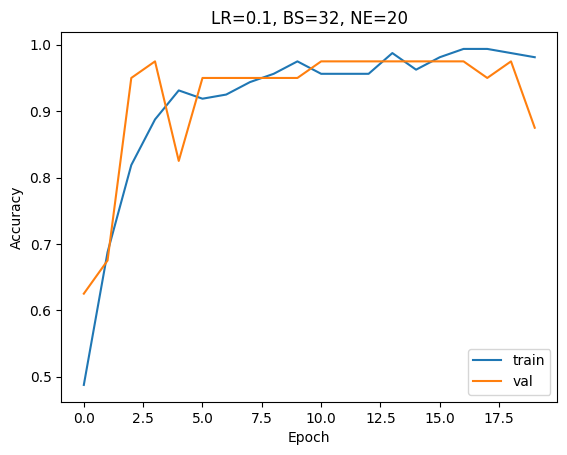

Epoch 1/30
5/5 [==============================] - 2s 63ms/step - loss: 181.7591 - accuracy: 0.5688 - val_loss: 1.5626 - val_accuracy: 0.9500
Epoch 2/30
5/5 [==============================] - 0s 28ms/step - loss: 32.4860 - accuracy: 0.5188 - val_loss: 2.4096 - val_accuracy: 0.6250
Epoch 3/30
5/5 [==============================] - 0s 26ms/step - loss: 3.5852 - accuracy: 0.5437 - val_loss: 0.7478 - val_accuracy: 0.6250
Epoch 4/30
5/5 [==============================] - 0s 26ms/step - loss: 0.8295 - accuracy: 0.7688 - val_loss: 0.4321 - val_accuracy: 0.8500
Epoch 5/30
5/5 [==============================] - 0s 29ms/step - loss: 0.4672 - accuracy: 0.9187 - val_loss: 0.5280 - val_accuracy: 0.9250
Epoch 6/30
5/5 [==============================] - 0s 25ms/step - loss: 0.5382 - accuracy: 0.8813 - val_loss: 0.5432 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 0s 29ms/step - loss: 0.7981 - accuracy: 0.8938 - val_loss: 0.5440 - val_accuracy: 0.8750
Epoch 8/30
5/5 [========

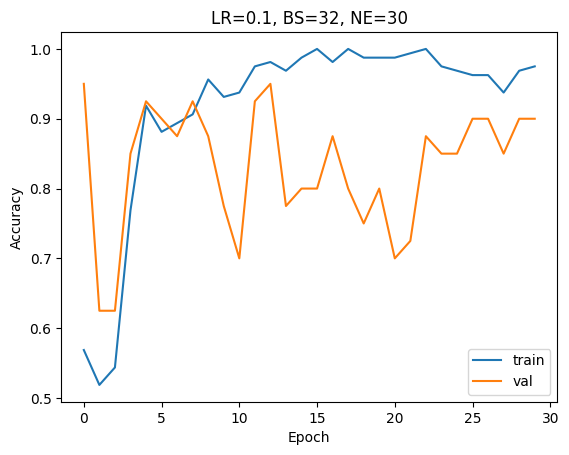

Epoch 1/10
5/5 [==============================] - 2s 64ms/step - loss: 294.2238 - accuracy: 0.5063 - val_loss: 1.4168 - val_accuracy: 0.8250
Epoch 2/10
5/5 [==============================] - 0s 25ms/step - loss: 69.6200 - accuracy: 0.5938 - val_loss: 3.5500 - val_accuracy: 0.7750
Epoch 3/10
5/5 [==============================] - 0s 27ms/step - loss: 7.0992 - accuracy: 0.6812 - val_loss: 1.2882 - val_accuracy: 0.6750
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 0.8218 - accuracy: 0.8250 - val_loss: 0.5167 - val_accuracy: 0.7500
Epoch 5/10
5/5 [==============================] - 0s 28ms/step - loss: 0.4735 - accuracy: 0.9125 - val_loss: 0.4947 - val_accuracy: 0.8250
Epoch 6/10
5/5 [==============================] - 0s 28ms/step - loss: 0.4571 - accuracy: 0.9500 - val_loss: 0.5060 - val_accuracy: 0.9000
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.5112 - accuracy: 0.9062 - val_loss: 0.4732 - val_accuracy: 0.8250
Epoch 8/10
5/5 [========

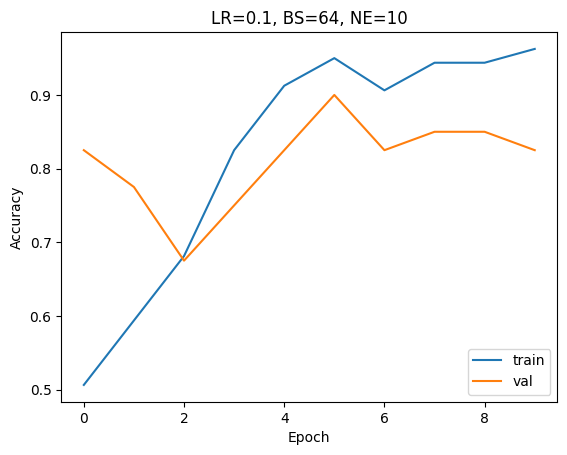

Epoch 1/20
5/5 [==============================] - 3s 93ms/step - loss: 340.1245 - accuracy: 0.5312 - val_loss: 194.7956 - val_accuracy: 0.4500
Epoch 2/20
5/5 [==============================] - 0s 38ms/step - loss: 74.4616 - accuracy: 0.5125 - val_loss: 2.7589 - val_accuracy: 0.5500
Epoch 3/20
5/5 [==============================] - 0s 35ms/step - loss: 4.8384 - accuracy: 0.7688 - val_loss: 1.1706 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 31ms/step - loss: 3.9463 - accuracy: 0.8625 - val_loss: 2.3701 - val_accuracy: 0.8000
Epoch 5/20
5/5 [==============================] - 0s 31ms/step - loss: 1.4141 - accuracy: 0.9125 - val_loss: 0.7132 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 36ms/step - loss: 1.0228 - accuracy: 0.9187 - val_loss: 0.2529 - val_accuracy: 0.9500
Epoch 7/20
5/5 [==============================] - 0s 35ms/step - loss: 0.2818 - accuracy: 0.9375 - val_loss: 0.1619 - val_accuracy: 0.9500
Epoch 8/20
5/5 [======

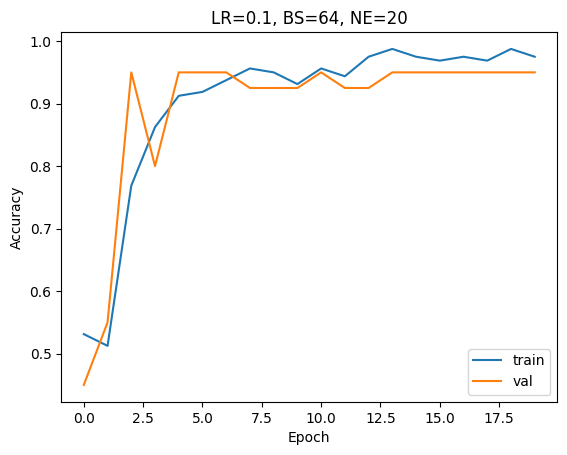

Epoch 1/30
5/5 [==============================] - 2s 69ms/step - loss: 376.9364 - accuracy: 0.4875 - val_loss: 5.0351 - val_accuracy: 0.8250
Epoch 2/30
5/5 [==============================] - 0s 30ms/step - loss: 99.2565 - accuracy: 0.6125 - val_loss: 2.1928 - val_accuracy: 0.9000
Epoch 3/30
5/5 [==============================] - 0s 25ms/step - loss: 6.5945 - accuracy: 0.8375 - val_loss: 0.3030 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 1.1211 - accuracy: 0.8750 - val_loss: 0.9854 - val_accuracy: 0.7500
Epoch 5/30
5/5 [==============================] - 0s 27ms/step - loss: 1.2143 - accuracy: 0.7625 - val_loss: 0.5296 - val_accuracy: 0.6750
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 0.5958 - accuracy: 0.8375 - val_loss: 0.4494 - val_accuracy: 0.7250
Epoch 7/30
5/5 [==============================] - 0s 24ms/step - loss: 0.4988 - accuracy: 0.8562 - val_loss: 0.4503 - val_accuracy: 0.8000
Epoch 8/30
5/5 [========

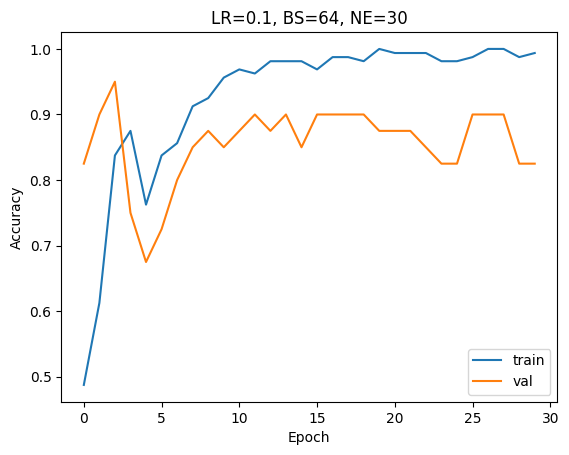

Epoch 1/10
5/5 [==============================] - 2s 66ms/step - loss: 150.9337 - accuracy: 0.4938 - val_loss: 3.3360 - val_accuracy: 0.9000
Epoch 2/10
5/5 [==============================] - 0s 28ms/step - loss: 26.4031 - accuracy: 0.7688 - val_loss: 7.9431 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 26ms/step - loss: 11.5474 - accuracy: 0.8313 - val_loss: 3.2687 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 4.2471 - accuracy: 0.8875 - val_loss: 2.1688 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 2.1305 - accuracy: 0.7625 - val_loss: 1.1280 - val_accuracy: 0.7000
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 1.5374 - accuracy: 0.8000 - val_loss: 0.8158 - val_accuracy: 0.7000
Epoch 7/10
5/5 [==============================] - 0s 27ms/step - loss: 0.6463 - accuracy: 0.8938 - val_loss: 0.4316 - val_accuracy: 0.9250
Epoch 8/10
5/5 [=======

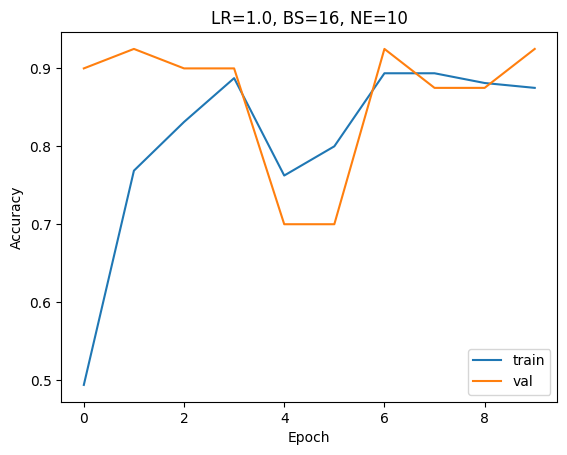

Epoch 1/20
5/5 [==============================] - 3s 90ms/step - loss: 117.7516 - accuracy: 0.5250 - val_loss: 1.6493 - val_accuracy: 0.9250
Epoch 2/20
5/5 [==============================] - 0s 31ms/step - loss: 15.9942 - accuracy: 0.6562 - val_loss: 2.4514 - val_accuracy: 0.8250
Epoch 3/20
5/5 [==============================] - 0s 31ms/step - loss: 4.2578 - accuracy: 0.7250 - val_loss: 1.4630 - val_accuracy: 0.8250
Epoch 4/20
5/5 [==============================] - 0s 36ms/step - loss: 2.9756 - accuracy: 0.8438 - val_loss: 0.4295 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 0s 30ms/step - loss: 1.0183 - accuracy: 0.8125 - val_loss: 0.3523 - val_accuracy: 0.9250
Epoch 6/20
5/5 [==============================] - 0s 34ms/step - loss: 0.4550 - accuracy: 0.8438 - val_loss: 0.4514 - val_accuracy: 0.7250
Epoch 7/20
5/5 [==============================] - 0s 27ms/step - loss: 0.4287 - accuracy: 0.8750 - val_loss: 0.4271 - val_accuracy: 0.8250
Epoch 8/20
5/5 [========

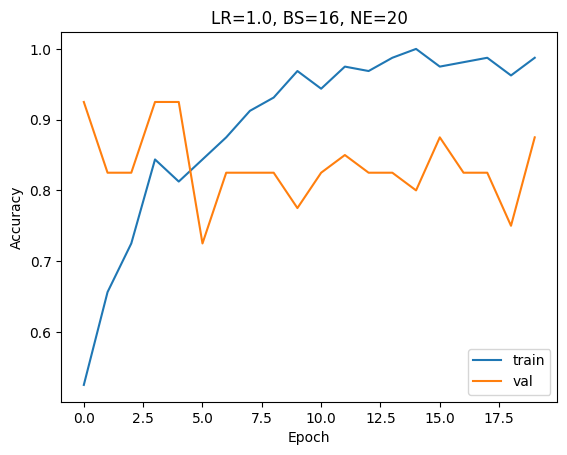

Epoch 1/30
5/5 [==============================] - 2s 66ms/step - loss: 136.7578 - accuracy: 0.5375 - val_loss: 1.9639 - val_accuracy: 0.8500
Epoch 2/30
5/5 [==============================] - 0s 31ms/step - loss: 39.5536 - accuracy: 0.7000 - val_loss: 0.1660 - val_accuracy: 0.9750
Epoch 3/30
5/5 [==============================] - 0s 27ms/step - loss: 2.8436 - accuracy: 0.8687 - val_loss: 0.3646 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 0s 26ms/step - loss: 1.1732 - accuracy: 0.8938 - val_loss: 0.6577 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 0s 26ms/step - loss: 0.4434 - accuracy: 0.9000 - val_loss: 0.2321 - val_accuracy: 0.9500
Epoch 6/30
5/5 [==============================] - 0s 27ms/step - loss: 0.2176 - accuracy: 0.9187 - val_loss: 0.1234 - val_accuracy: 0.9500
Epoch 7/30
5/5 [==============================] - 0s 26ms/step - loss: 0.1940 - accuracy: 0.9438 - val_loss: 0.1212 - val_accuracy: 0.9500
Epoch 8/30
5/5 [========

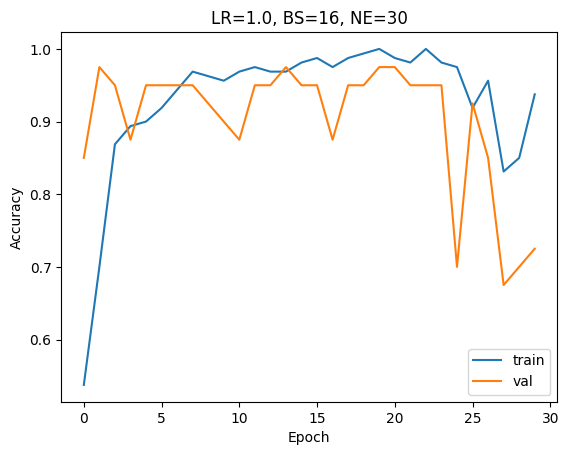

Epoch 1/10
5/5 [==============================] - 2s 68ms/step - loss: 290.5514 - accuracy: 0.5813 - val_loss: 7.7830 - val_accuracy: 0.9000
Epoch 2/10
5/5 [==============================] - 0s 33ms/step - loss: 78.0101 - accuracy: 0.6625 - val_loss: 12.3601 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 21.1061 - accuracy: 0.8125 - val_loss: 5.4653 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 0s 34ms/step - loss: 9.0852 - accuracy: 0.8813 - val_loss: 3.8775 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 0s 32ms/step - loss: 2.9017 - accuracy: 0.8687 - val_loss: 0.3619 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.7272 - accuracy: 0.9250 - val_loss: 0.1905 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 0.2361 - accuracy: 0.9500 - val_loss: 0.3093 - val_accuracy: 0.9000
Epoch 8/10
5/5 [======

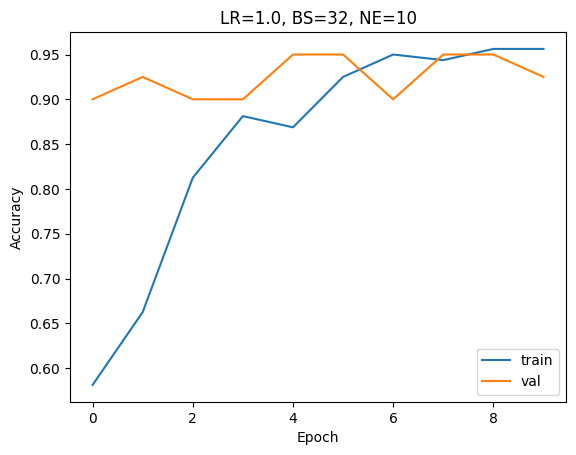

Epoch 1/20
5/5 [==============================] - 3s 65ms/step - loss: 365.7112 - accuracy: 0.5125 - val_loss: 134.7805 - val_accuracy: 0.4500
Epoch 2/20
5/5 [==============================] - 0s 28ms/step - loss: 109.7822 - accuracy: 0.4875 - val_loss: 2.5811 - val_accuracy: 0.8750
Epoch 3/20
5/5 [==============================] - 0s 25ms/step - loss: 23.7305 - accuracy: 0.6187 - val_loss: 2.0807 - val_accuracy: 0.9000
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 3.2127 - accuracy: 0.8188 - val_loss: 0.9887 - val_accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 0s 28ms/step - loss: 5.7345 - accuracy: 0.8125 - val_loss: 2.4806 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 2.3949 - accuracy: 0.8438 - val_loss: 2.2661 - val_accuracy: 0.8500
Epoch 7/20
5/5 [==============================] - 0s 27ms/step - loss: 0.7568 - accuracy: 0.8938 - val_loss: 1.7549 - val_accuracy: 0.8000
Epoch 8/20
5/5 [====

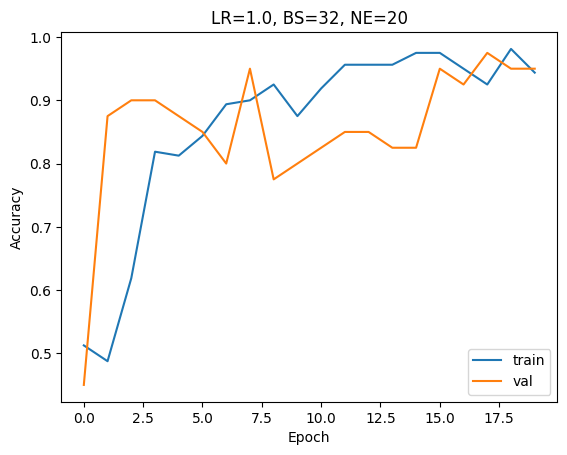

Epoch 1/30
5/5 [==============================] - 2s 62ms/step - loss: 180.9498 - accuracy: 0.5375 - val_loss: 38.1710 - val_accuracy: 0.5750
Epoch 2/30
5/5 [==============================] - 0s 29ms/step - loss: 28.0377 - accuracy: 0.7437 - val_loss: 2.8957 - val_accuracy: 0.8750
Epoch 3/30
5/5 [==============================] - 0s 27ms/step - loss: 5.7298 - accuracy: 0.8750 - val_loss: 0.6605 - val_accuracy: 0.9250
Epoch 4/30
5/5 [==============================] - 0s 26ms/step - loss: 0.9336 - accuracy: 0.8625 - val_loss: 0.5309 - val_accuracy: 0.9000
Epoch 5/30
5/5 [==============================] - 0s 27ms/step - loss: 0.5218 - accuracy: 0.9312 - val_loss: 0.7096 - val_accuracy: 0.8500
Epoch 6/30
5/5 [==============================] - 0s 27ms/step - loss: 0.3754 - accuracy: 0.9000 - val_loss: 0.3087 - val_accuracy: 0.9250
Epoch 7/30
5/5 [==============================] - 0s 24ms/step - loss: 0.3865 - accuracy: 0.9500 - val_loss: 0.3200 - val_accuracy: 0.9250
Epoch 8/30
5/5 [=======

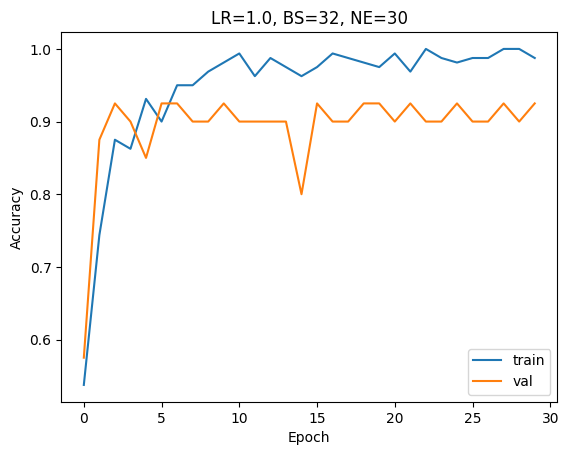

Epoch 1/10
5/5 [==============================] - 3s 85ms/step - loss: 246.3641 - accuracy: 0.5688 - val_loss: 35.0532 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 0s 35ms/step - loss: 32.9292 - accuracy: 0.6375 - val_loss: 2.6401 - val_accuracy: 0.6750
Epoch 3/10
5/5 [==============================] - 0s 35ms/step - loss: 3.3637 - accuracy: 0.7125 - val_loss: 0.6885 - val_accuracy: 0.6750
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.8544 - accuracy: 0.8000 - val_loss: 0.4715 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 31ms/step - loss: 0.5079 - accuracy: 0.8875 - val_loss: 0.4275 - val_accuracy: 0.8250
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 0.4208 - accuracy: 0.9688 - val_loss: 0.4184 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 0.4305 - accuracy: 0.9563 - val_loss: 0.4119 - val_accuracy: 0.8750
Epoch 8/10
5/5 [=======

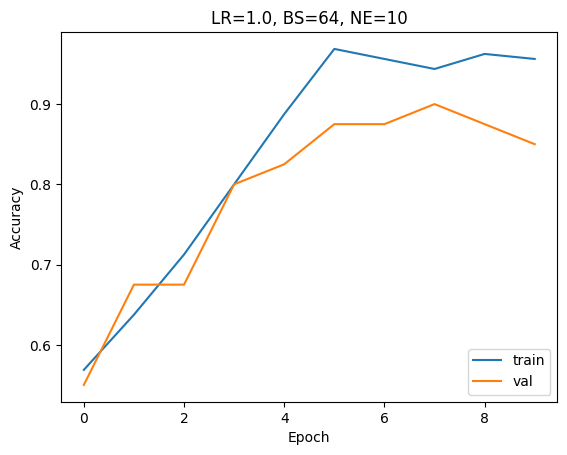

Epoch 1/20
5/5 [==============================] - 2s 68ms/step - loss: 228.9104 - accuracy: 0.5625 - val_loss: 13.1962 - val_accuracy: 0.5500
Epoch 2/20
5/5 [==============================] - 0s 31ms/step - loss: 31.0889 - accuracy: 0.7063 - val_loss: 1.9033 - val_accuracy: 0.8250
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 2.2026 - accuracy: 0.8062 - val_loss: 0.4127 - val_accuracy: 0.9250
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 0.6397 - accuracy: 0.9000 - val_loss: 0.4124 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 0s 29ms/step - loss: 0.3865 - accuracy: 0.9125 - val_loss: 0.4631 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 0.4722 - accuracy: 0.9375 - val_loss: 0.5191 - val_accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 0s 24ms/step - loss: 0.3745 - accuracy: 0.9563 - val_loss: 0.5352 - val_accuracy: 0.8750
Epoch 8/20
5/5 [=======

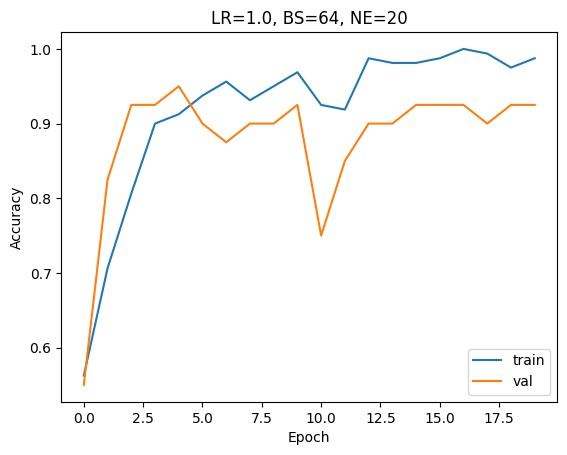

Epoch 1/30
5/5 [==============================] - 2s 68ms/step - loss: 534.2400 - accuracy: 0.5250 - val_loss: 153.3993 - val_accuracy: 0.4500
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 77.0142 - accuracy: 0.5688 - val_loss: 2.5286 - val_accuracy: 0.9250
Epoch 3/30
5/5 [==============================] - 0s 25ms/step - loss: 7.9290 - accuracy: 0.8062 - val_loss: 2.7727 - val_accuracy: 0.8250
Epoch 4/30
5/5 [==============================] - 0s 26ms/step - loss: 7.3535 - accuracy: 0.8125 - val_loss: 6.0541 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 0s 27ms/step - loss: 4.8690 - accuracy: 0.8562 - val_loss: 2.6107 - val_accuracy: 0.9250
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 2.3835 - accuracy: 0.8938 - val_loss: 0.5958 - val_accuracy: 0.9250
Epoch 7/30
5/5 [==============================] - 0s 23ms/step - loss: 0.3046 - accuracy: 0.9000 - val_loss: 0.2573 - val_accuracy: 0.9250
Epoch 8/30
5/5 [======

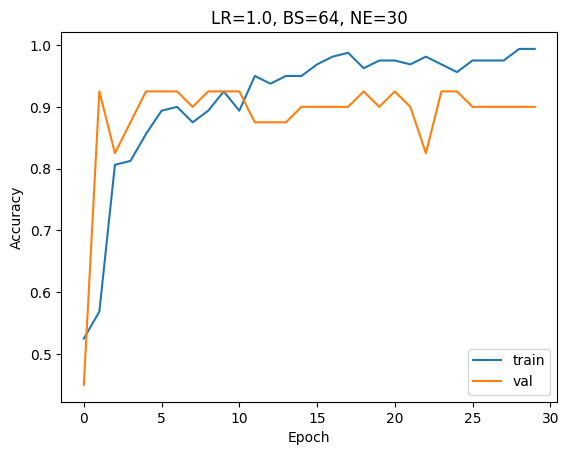

In [16]:
import matplotlib.pyplot as plt

# create lists of different parameter values to test
learning_rates = [0.001, 0.01, 0.1, 1.0]
batch_sizes = [16, 32, 64]
num_epochs = [10, 20, 30]

# loop over parameter combinations and train models
for lr in learning_rates:
    for bs in batch_sizes:
        for ne in num_epochs:
            E_model = create_model(lr, bs)  # create model with specified learning rate and batch size
            # compile the neural network
            E_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            history = E_model.fit(EX_train, EY_train, epochs=ne, validation_split=0.2)
            
            # plot training and validation accuracy over epochs
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title(f"LR={lr}, BS={bs}, NE={ne}")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.legend(['train', 'val'], loc='lower right')
            plt.show()


Epoch 1/10
5/5 [==============================] - 2s 88ms/step - loss: 128.3983 - accuracy: 0.5063 - val_loss: 48.3212 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 31ms/step - loss: 33.9311 - accuracy: 0.5813 - val_loss: 0.6292 - val_accuracy: 0.9500
Epoch 3/10
5/5 [==============================] - 0s 37ms/step - loss: 2.9316 - accuracy: 0.8562 - val_loss: 0.2247 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 0s 28ms/step - loss: 2.9066 - accuracy: 0.8438 - val_loss: 0.0450 - val_accuracy: 0.9750
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 1.6137 - accuracy: 0.8062 - val_loss: 0.1052 - val_accuracy: 0.9750
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.6975 - accuracy: 0.9000 - val_loss: 0.5039 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 29ms/step - loss: 0.6548 - accuracy: 0.9000 - val_loss: 0.3006 - val_accuracy: 0.9000
Epoch 8/10
5/5 [=======

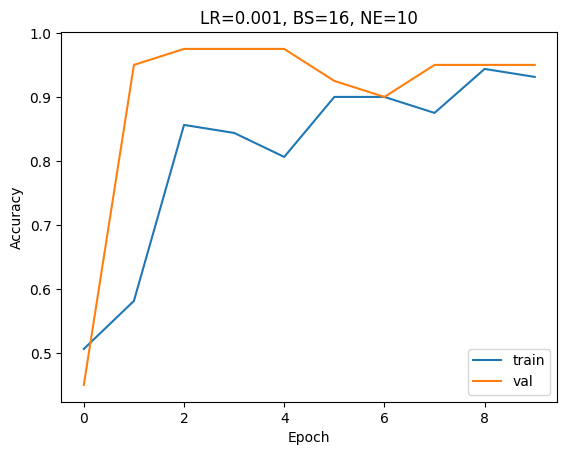

Epoch 1/20
5/5 [==============================] - 2s 63ms/step - loss: 276.7933 - accuracy: 0.5125 - val_loss: 5.0654 - val_accuracy: 0.8500
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 91.7345 - accuracy: 0.5688 - val_loss: 8.7486 - val_accuracy: 0.8500
Epoch 3/20
5/5 [==============================] - 0s 27ms/step - loss: 19.4893 - accuracy: 0.7500 - val_loss: 4.0303 - val_accuracy: 0.9000
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 5.1938 - accuracy: 0.8188 - val_loss: 1.2239 - val_accuracy: 0.9500
Epoch 5/20
5/5 [==============================] - 0s 24ms/step - loss: 1.7793 - accuracy: 0.9187 - val_loss: 2.6658 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 1.7173 - accuracy: 0.8625 - val_loss: 1.9537 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 0s 25ms/step - loss: 0.9847 - accuracy: 0.8750 - val_loss: 0.1320 - val_accuracy: 0.9250
Epoch 8/20
5/5 [=======

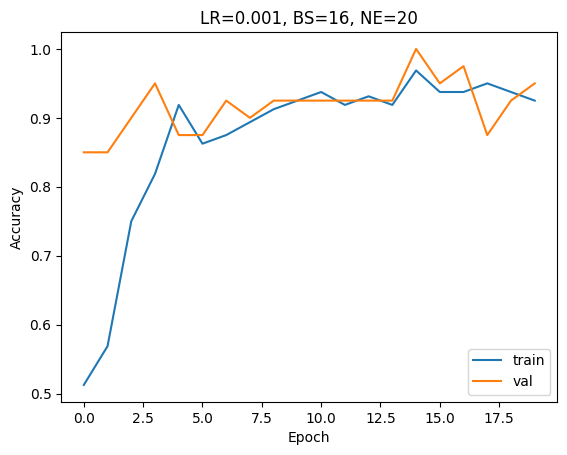

Epoch 1/30
5/5 [==============================] - 2s 66ms/step - loss: 289.3977 - accuracy: 0.4437 - val_loss: 10.1312 - val_accuracy: 0.5500
Epoch 2/30
5/5 [==============================] - 0s 33ms/step - loss: 45.8230 - accuracy: 0.5250 - val_loss: 0.4709 - val_accuracy: 0.7250
Epoch 3/30
5/5 [==============================] - 0s 31ms/step - loss: 1.1195 - accuracy: 0.5813 - val_loss: 0.4724 - val_accuracy: 0.8500
Epoch 4/30
5/5 [==============================] - 0s 30ms/step - loss: 0.6599 - accuracy: 0.7812 - val_loss: 0.5950 - val_accuracy: 0.8500
Epoch 5/30
5/5 [==============================] - 0s 28ms/step - loss: 0.5935 - accuracy: 0.8625 - val_loss: 0.6031 - val_accuracy: 0.8750
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 0.5927 - accuracy: 0.8438 - val_loss: 0.5037 - val_accuracy: 0.8500
Epoch 7/30
5/5 [==============================] - 0s 25ms/step - loss: 0.5300 - accuracy: 0.8562 - val_loss: 0.4189 - val_accuracy: 0.8500
Epoch 8/30
5/5 [=======

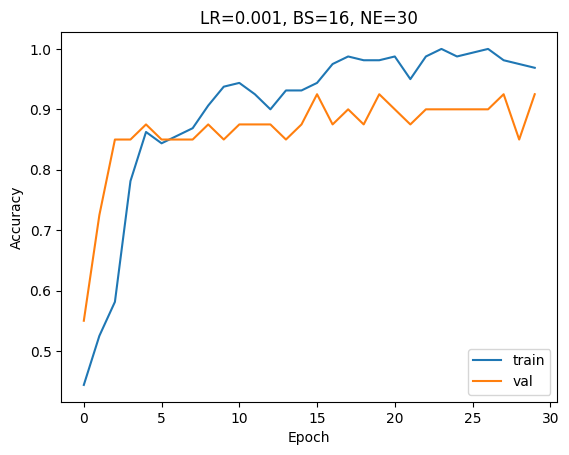

Epoch 1/10
5/5 [==============================] - 2s 65ms/step - loss: 411.4059 - accuracy: 0.5063 - val_loss: 35.5765 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 28ms/step - loss: 89.0432 - accuracy: 0.5875 - val_loss: 4.7917 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 0s 27ms/step - loss: 10.1311 - accuracy: 0.6250 - val_loss: 0.7677 - val_accuracy: 0.7250
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 1.2419 - accuracy: 0.7188 - val_loss: 0.4140 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 0s 24ms/step - loss: 0.5733 - accuracy: 0.7875 - val_loss: 0.4134 - val_accuracy: 0.8000
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.5311 - accuracy: 0.8250 - val_loss: 0.5614 - val_accuracy: 0.8250
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5744 - accuracy: 0.8188 - val_loss: 0.5823 - val_accuracy: 0.7500
Epoch 8/10
5/5 [======

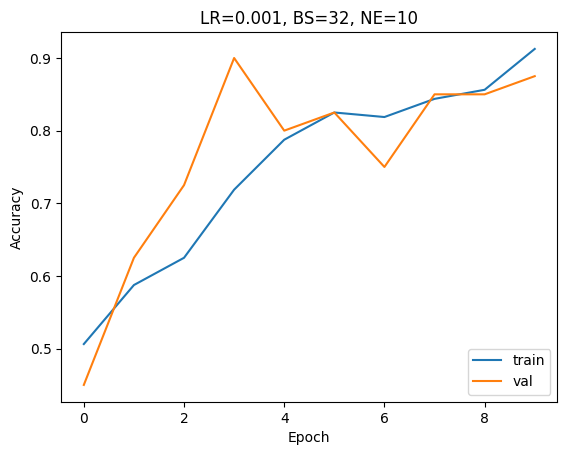

Epoch 1/20
5/5 [==============================] - 2s 63ms/step - loss: 223.8877 - accuracy: 0.5625 - val_loss: 24.2524 - val_accuracy: 0.7000
Epoch 2/20
5/5 [==============================] - 0s 29ms/step - loss: 45.4992 - accuracy: 0.7312 - val_loss: 0.8381 - val_accuracy: 0.9500
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 7.5764 - accuracy: 0.8062 - val_loss: 0.9707 - val_accuracy: 0.9250
Epoch 4/20
5/5 [==============================] - 0s 26ms/step - loss: 1.9567 - accuracy: 0.8125 - val_loss: 0.2785 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 0s 22ms/step - loss: 1.1428 - accuracy: 0.7312 - val_loss: 0.5014 - val_accuracy: 0.8500
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 0.5957 - accuracy: 0.8062 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 7/20
5/5 [==============================] - 0s 25ms/step - loss: 0.5152 - accuracy: 0.8562 - val_loss: 0.4905 - val_accuracy: 0.8500
Epoch 8/20
5/5 [=======

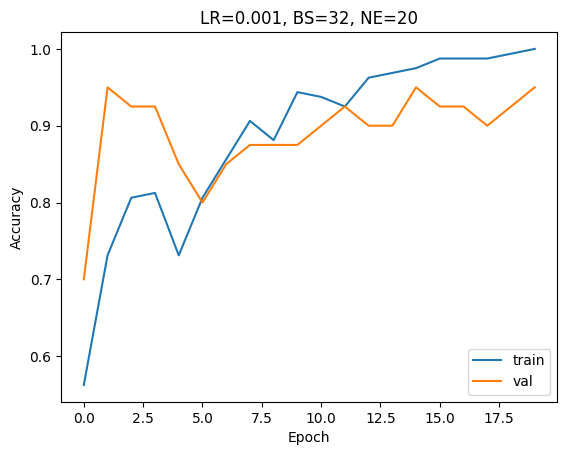

Epoch 1/30
5/5 [==============================] - 3s 73ms/step - loss: 235.5851 - accuracy: 0.4437 - val_loss: 48.1281 - val_accuracy: 0.4500
Epoch 2/30
5/5 [==============================] - 0s 29ms/step - loss: 48.3873 - accuracy: 0.5813 - val_loss: 1.6661 - val_accuracy: 0.8500
Epoch 3/30
5/5 [==============================] - 0s 27ms/step - loss: 6.0662 - accuracy: 0.7312 - val_loss: 1.0759 - val_accuracy: 0.8250
Epoch 4/30
5/5 [==============================] - 0s 23ms/step - loss: 1.8502 - accuracy: 0.7688 - val_loss: 0.4221 - val_accuracy: 0.8000
Epoch 5/30
5/5 [==============================] - 0s 24ms/step - loss: 0.9410 - accuracy: 0.8562 - val_loss: 0.3885 - val_accuracy: 0.8500
Epoch 6/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4724 - accuracy: 0.8813 - val_loss: 0.4302 - val_accuracy: 0.8750
Epoch 7/30
5/5 [==============================] - 0s 22ms/step - loss: 0.5016 - accuracy: 0.8375 - val_loss: 0.4242 - val_accuracy: 0.8250
Epoch 8/30
5/5 [=======

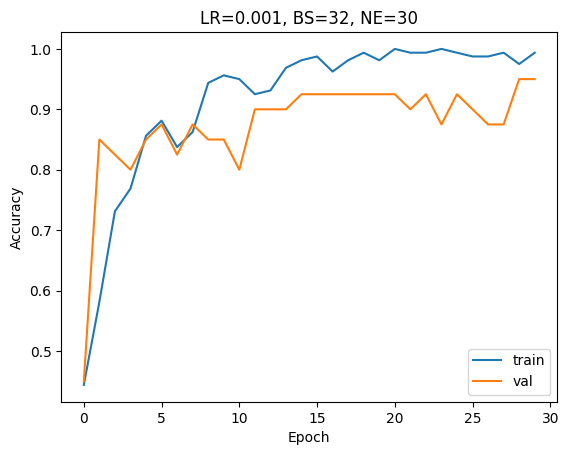

Epoch 1/10
5/5 [==============================] - 3s 212ms/step - loss: 233.4893 - accuracy: 0.5312 - val_loss: 47.2670 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 34ms/step - loss: 55.2105 - accuracy: 0.6438 - val_loss: 2.3147 - val_accuracy: 0.8500
Epoch 3/10
5/5 [==============================] - 0s 30ms/step - loss: 8.0513 - accuracy: 0.7875 - val_loss: 2.0269 - val_accuracy: 0.8250
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 2.3310 - accuracy: 0.8438 - val_loss: 0.3320 - val_accuracy: 0.7000
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 0.7299 - accuracy: 0.8125 - val_loss: 0.3640 - val_accuracy: 0.9250
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 0.9281 - accuracy: 0.8313 - val_loss: 0.3905 - val_accuracy: 0.8500
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 0.6208 - accuracy: 0.8438 - val_loss: 0.9206 - val_accuracy: 0.8750
Epoch 8/10
5/5 [======

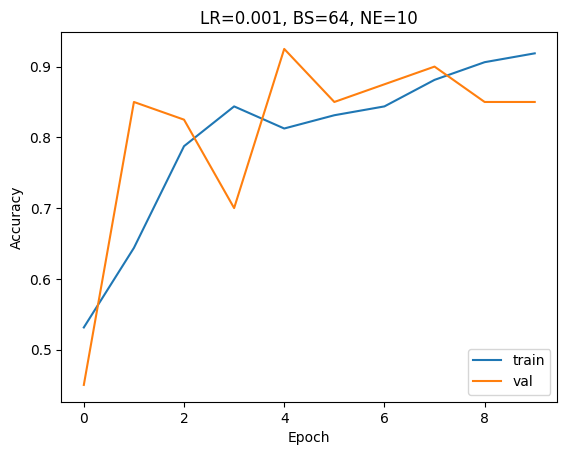

Epoch 1/20
5/5 [==============================] - 2s 65ms/step - loss: 212.7627 - accuracy: 0.5312 - val_loss: 39.9682 - val_accuracy: 0.4500
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 26.7998 - accuracy: 0.5750 - val_loss: 0.4761 - val_accuracy: 0.7750
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 2.0457 - accuracy: 0.7063 - val_loss: 1.0021 - val_accuracy: 0.6500
Epoch 4/20
5/5 [==============================] - 0s 26ms/step - loss: 0.6923 - accuracy: 0.7750 - val_loss: 0.5907 - val_accuracy: 0.7250
Epoch 5/20
5/5 [==============================] - 0s 23ms/step - loss: 0.7661 - accuracy: 0.7688 - val_loss: 0.5383 - val_accuracy: 0.8500
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 0.5269 - accuracy: 0.8813 - val_loss: 0.4345 - val_accuracy: 0.8250
Epoch 7/20
5/5 [==============================] - 0s 22ms/step - loss: 0.4791 - accuracy: 0.8313 - val_loss: 0.3684 - val_accuracy: 0.8750
Epoch 8/20
5/5 [=======

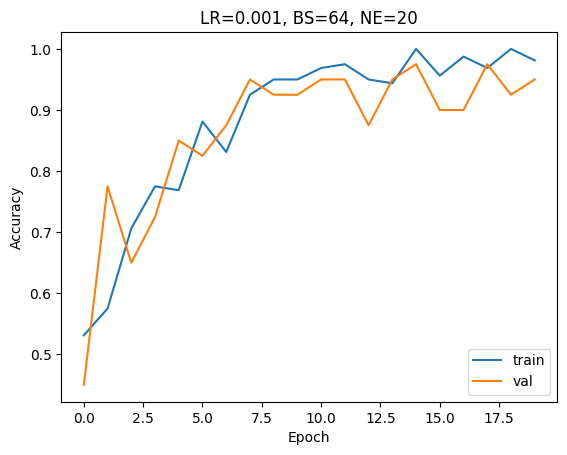

Epoch 1/30
5/5 [==============================] - 2s 63ms/step - loss: 228.5463 - accuracy: 0.4313 - val_loss: 8.4680 - val_accuracy: 0.7750
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 50.4230 - accuracy: 0.5750 - val_loss: 0.8279 - val_accuracy: 0.9000
Epoch 3/30
5/5 [==============================] - 0s 30ms/step - loss: 7.4280 - accuracy: 0.6562 - val_loss: 1.6787 - val_accuracy: 0.7750
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 2.5321 - accuracy: 0.7625 - val_loss: 0.5207 - val_accuracy: 0.9000
Epoch 5/30
5/5 [==============================] - 0s 28ms/step - loss: 1.4046 - accuracy: 0.8562 - val_loss: 0.1159 - val_accuracy: 0.9750
Epoch 6/30
5/5 [==============================] - 0s 22ms/step - loss: 0.6116 - accuracy: 0.8875 - val_loss: 0.2911 - val_accuracy: 0.8750
Epoch 7/30
5/5 [==============================] - 0s 25ms/step - loss: 0.8611 - accuracy: 0.8313 - val_loss: 0.6081 - val_accuracy: 0.8000
Epoch 8/30
5/5 [========

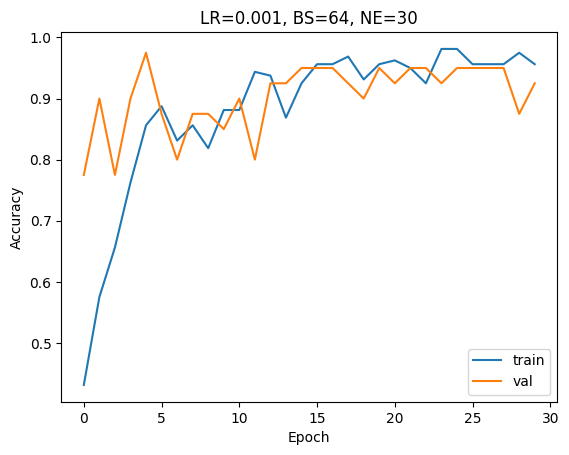

Epoch 1/10
5/5 [==============================] - 2s 68ms/step - loss: 212.4435 - accuracy: 0.5500 - val_loss: 35.7212 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 27ms/step - loss: 43.5239 - accuracy: 0.6062 - val_loss: 1.2611 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 0s 32ms/step - loss: 4.7227 - accuracy: 0.6625 - val_loss: 1.2308 - val_accuracy: 0.7750
Epoch 4/10
5/5 [==============================] - 0s 27ms/step - loss: 3.2681 - accuracy: 0.7688 - val_loss: 1.1061 - val_accuracy: 0.9000
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 1.3079 - accuracy: 0.8687 - val_loss: 0.1706 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 0s 26ms/step - loss: 0.9699 - accuracy: 0.8188 - val_loss: 0.4997 - val_accuracy: 0.8500
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.8400 - accuracy: 0.8125 - val_loss: 0.4554 - val_accuracy: 0.8750
Epoch 8/10
5/5 [=======

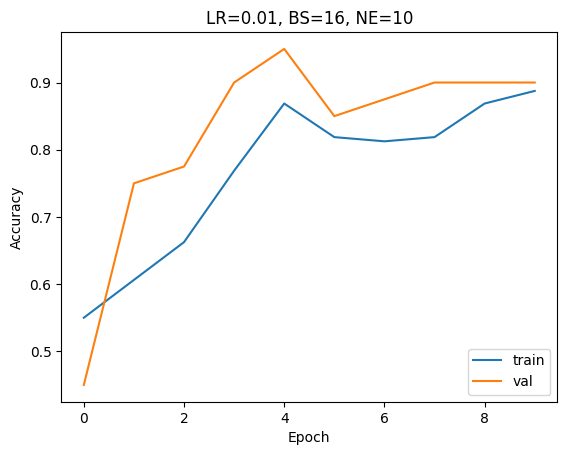

Epoch 1/20
5/5 [==============================] - 2s 67ms/step - loss: 156.6488 - accuracy: 0.5063 - val_loss: 9.5504 - val_accuracy: 0.8250
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 26.1047 - accuracy: 0.7625 - val_loss: 11.6641 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 20.5033 - accuracy: 0.7437 - val_loss: 2.0951 - val_accuracy: 0.8750
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 8.2951 - accuracy: 0.8125 - val_loss: 9.9538 - val_accuracy: 0.8250
Epoch 5/20
5/5 [==============================] - 0s 24ms/step - loss: 6.6671 - accuracy: 0.8438 - val_loss: 1.0147 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 2.4821 - accuracy: 0.8813 - val_loss: 0.2831 - val_accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 0s 22ms/step - loss: 1.5505 - accuracy: 0.8500 - val_loss: 0.3522 - val_accuracy: 0.8750
Epoch 8/20
5/5 [======

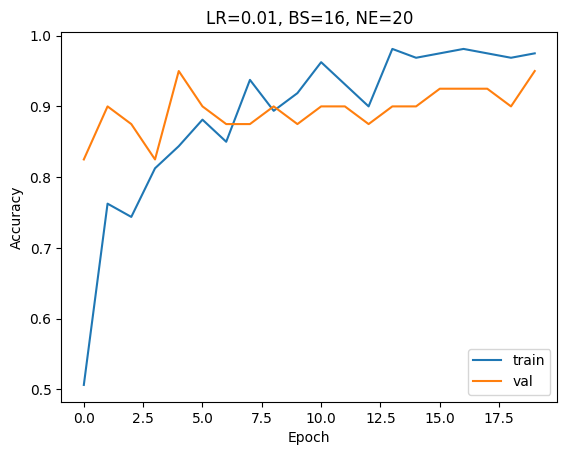

Epoch 1/30
5/5 [==============================] - 2s 71ms/step - loss: 381.6097 - accuracy: 0.4563 - val_loss: 50.7062 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 0s 28ms/step - loss: 136.4237 - accuracy: 0.5938 - val_loss: 7.2322 - val_accuracy: 0.8250
Epoch 3/30
5/5 [==============================] - 0s 28ms/step - loss: 6.4338 - accuracy: 0.8062 - val_loss: 1.1106 - val_accuracy: 0.6250
Epoch 4/30
5/5 [==============================] - 0s 26ms/step - loss: 2.4482 - accuracy: 0.6687 - val_loss: 0.3804 - val_accuracy: 0.9250
Epoch 5/30
5/5 [==============================] - 0s 28ms/step - loss: 0.9908 - accuracy: 0.8438 - val_loss: 0.7828 - val_accuracy: 0.8750
Epoch 6/30
5/5 [==============================] - 0s 29ms/step - loss: 0.5413 - accuracy: 0.9000 - val_loss: 0.3680 - val_accuracy: 0.9250
Epoch 7/30
5/5 [==============================] - 0s 28ms/step - loss: 0.4448 - accuracy: 0.9125 - val_loss: 0.4291 - val_accuracy: 0.9250
Epoch 8/30
5/5 [======

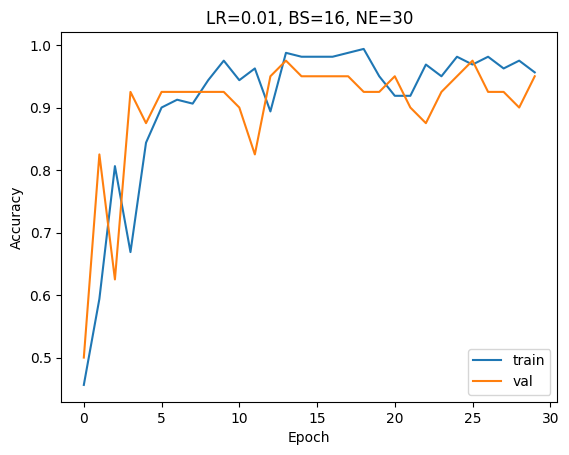

Epoch 1/10
5/5 [==============================] - 2s 66ms/step - loss: 444.7789 - accuracy: 0.5312 - val_loss: 4.9639 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 69.2932 - accuracy: 0.6375 - val_loss: 16.4530 - val_accuracy: 0.5250
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 11.7190 - accuracy: 0.7437 - val_loss: 1.5399 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 0s 28ms/step - loss: 6.9485 - accuracy: 0.8062 - val_loss: 9.3187 - val_accuracy: 0.7750
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 5.6462 - accuracy: 0.8188 - val_loss: 2.3120 - val_accuracy: 0.9250
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 1.2426 - accuracy: 0.8750 - val_loss: 2.0919 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 24ms/step - loss: 1.0311 - accuracy: 0.8875 - val_loss: 0.5688 - val_accuracy: 0.9250
Epoch 8/10
5/5 [======

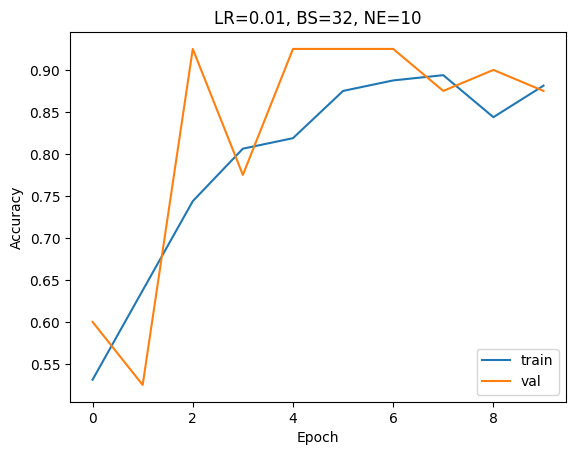

Epoch 1/20
5/5 [==============================] - 2s 87ms/step - loss: 207.7851 - accuracy: 0.4750 - val_loss: 6.0541 - val_accuracy: 0.8750
Epoch 2/20
5/5 [==============================] - 0s 33ms/step - loss: 38.9950 - accuracy: 0.7000 - val_loss: 4.9731 - val_accuracy: 0.7250
Epoch 3/20
5/5 [==============================] - 0s 30ms/step - loss: 9.6694 - accuracy: 0.7312 - val_loss: 0.7336 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 31ms/step - loss: 1.0269 - accuracy: 0.9062 - val_loss: 0.3691 - val_accuracy: 0.8750
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 0.6083 - accuracy: 0.9000 - val_loss: 0.7124 - val_accuracy: 0.9000
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 0.5944 - accuracy: 0.8813 - val_loss: 0.4713 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 0s 30ms/step - loss: 0.5151 - accuracy: 0.8562 - val_loss: 0.4351 - val_accuracy: 0.8750
Epoch 8/20
5/5 [========

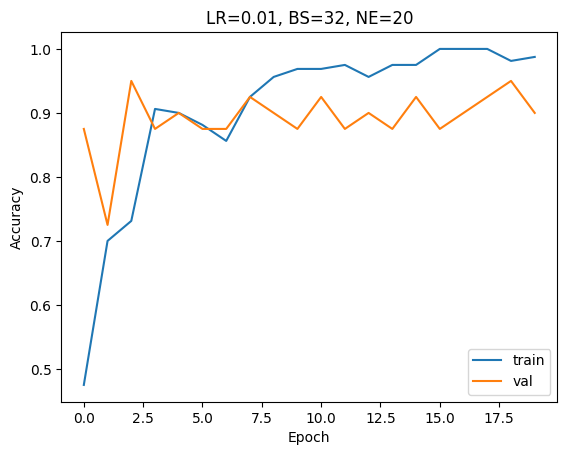

Epoch 1/30
5/5 [==============================] - 2s 66ms/step - loss: 211.6450 - accuracy: 0.5063 - val_loss: 23.0124 - val_accuracy: 0.5500
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 71.9018 - accuracy: 0.5562 - val_loss: 0.5428 - val_accuracy: 0.8000
Epoch 3/30
5/5 [==============================] - 0s 24ms/step - loss: 7.0852 - accuracy: 0.6625 - val_loss: 0.4625 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 0s 25ms/step - loss: 1.1201 - accuracy: 0.7625 - val_loss: 0.4729 - val_accuracy: 0.8000
Epoch 5/30
5/5 [==============================] - 0s 23ms/step - loss: 0.6946 - accuracy: 0.7875 - val_loss: 0.5233 - val_accuracy: 0.8500
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 0.5247 - accuracy: 0.8687 - val_loss: 0.5299 - val_accuracy: 0.8250
Epoch 7/30
5/5 [==============================] - 0s 23ms/step - loss: 0.5371 - accuracy: 0.8938 - val_loss: 0.3952 - val_accuracy: 0.8500
Epoch 8/30
5/5 [=======

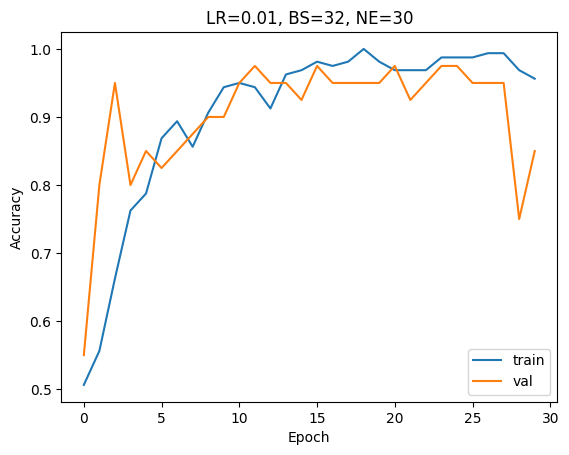

Epoch 1/10
5/5 [==============================] - 2s 69ms/step - loss: 505.9611 - accuracy: 0.4938 - val_loss: 119.3524 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 145.9480 - accuracy: 0.5625 - val_loss: 0.8126 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 0s 26ms/step - loss: 13.5661 - accuracy: 0.7188 - val_loss: 0.7927 - val_accuracy: 0.7750
Epoch 4/10
5/5 [==============================] - 0s 32ms/step - loss: 2.7771 - accuracy: 0.7125 - val_loss: 0.3005 - val_accuracy: 0.8500
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 1.4743 - accuracy: 0.7125 - val_loss: 0.6114 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 0.7374 - accuracy: 0.7500 - val_loss: 0.5038 - val_accuracy: 0.8250
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 0.5140 - accuracy: 0.8188 - val_loss: 0.4846 - val_accuracy: 0.8250
Epoch 8/10
5/5 [====

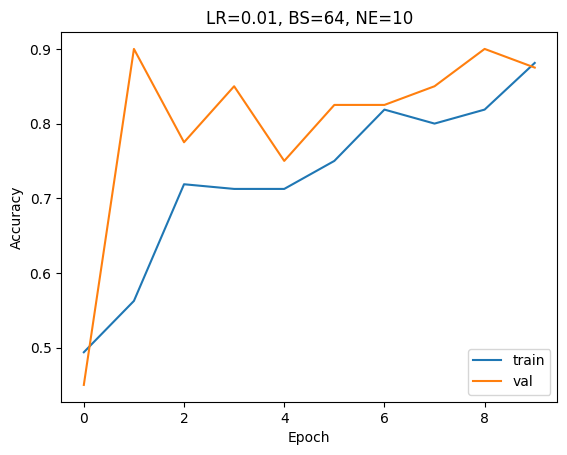

Epoch 1/20
5/5 [==============================] - 3s 68ms/step - loss: 171.1343 - accuracy: 0.4938 - val_loss: 26.5744 - val_accuracy: 0.6000
Epoch 2/20
5/5 [==============================] - 0s 30ms/step - loss: 70.1316 - accuracy: 0.6438 - val_loss: 1.8113 - val_accuracy: 0.9500
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 19.6559 - accuracy: 0.7812 - val_loss: 0.8553 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 27ms/step - loss: 5.8377 - accuracy: 0.7875 - val_loss: 0.6998 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 0s 27ms/step - loss: 2.7801 - accuracy: 0.7937 - val_loss: 0.0961 - val_accuracy: 0.9000
Epoch 6/20
5/5 [==============================] - 0s 24ms/step - loss: 1.4673 - accuracy: 0.8438 - val_loss: 0.1002 - val_accuracy: 0.9250
Epoch 7/20
5/5 [==============================] - 0s 27ms/step - loss: 1.7272 - accuracy: 0.8188 - val_loss: 0.1438 - val_accuracy: 0.9500
Epoch 8/20
5/5 [======

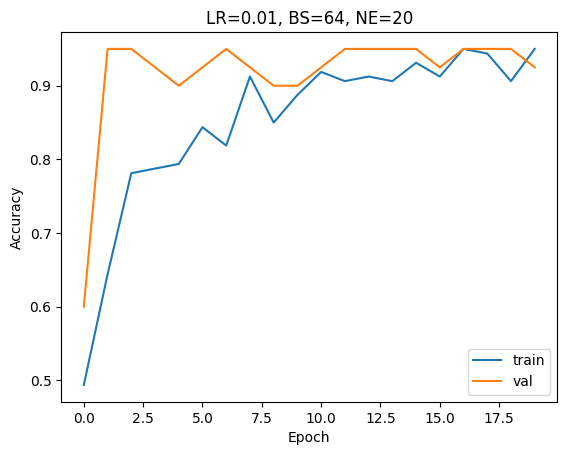

Epoch 1/30
5/5 [==============================] - 2s 64ms/step - loss: 484.6527 - accuracy: 0.4688 - val_loss: 96.6658 - val_accuracy: 0.4500
Epoch 2/30
5/5 [==============================] - 0s 29ms/step - loss: 95.6154 - accuracy: 0.6000 - val_loss: 2.5414 - val_accuracy: 0.8250
Epoch 3/30
5/5 [==============================] - 0s 29ms/step - loss: 16.0984 - accuracy: 0.6687 - val_loss: 3.3652 - val_accuracy: 0.5750
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 4.2384 - accuracy: 0.5625 - val_loss: 0.4764 - val_accuracy: 0.7750
Epoch 5/30
5/5 [==============================] - 0s 29ms/step - loss: 1.4141 - accuracy: 0.7563 - val_loss: 0.3551 - val_accuracy: 0.9000
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 0.4955 - accuracy: 0.9250 - val_loss: 0.3843 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 0s 24ms/step - loss: 0.6206 - accuracy: 0.8375 - val_loss: 0.4021 - val_accuracy: 0.9000
Epoch 8/30
5/5 [======

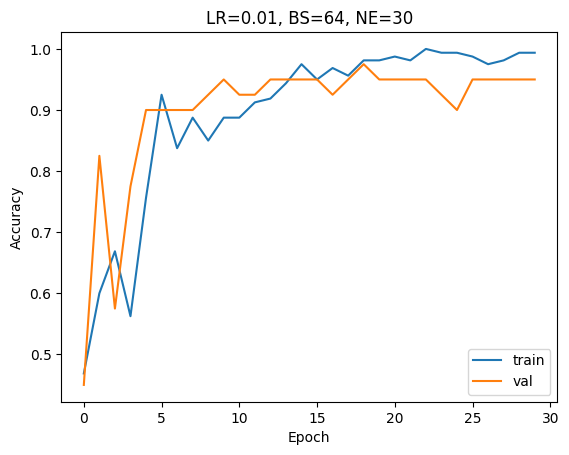

Epoch 1/10
5/5 [==============================] - 3s 90ms/step - loss: 297.6302 - accuracy: 0.5063 - val_loss: 0.1228 - val_accuracy: 0.9750
Epoch 2/10
5/5 [==============================] - 0s 33ms/step - loss: 30.0268 - accuracy: 0.4812 - val_loss: 0.8072 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 0s 30ms/step - loss: 2.1196 - accuracy: 0.5813 - val_loss: 0.5612 - val_accuracy: 0.7250
Epoch 4/10
5/5 [==============================] - 0s 28ms/step - loss: 0.8786 - accuracy: 0.8000 - val_loss: 0.5689 - val_accuracy: 0.8250
Epoch 5/10
5/5 [==============================] - 0s 28ms/step - loss: 0.7283 - accuracy: 0.8500 - val_loss: 0.6072 - val_accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 0s 26ms/step - loss: 0.5602 - accuracy: 0.8562 - val_loss: 0.4072 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 26ms/step - loss: 0.4773 - accuracy: 0.8562 - val_loss: 0.4204 - val_accuracy: 0.9250
Epoch 8/10
5/5 [========

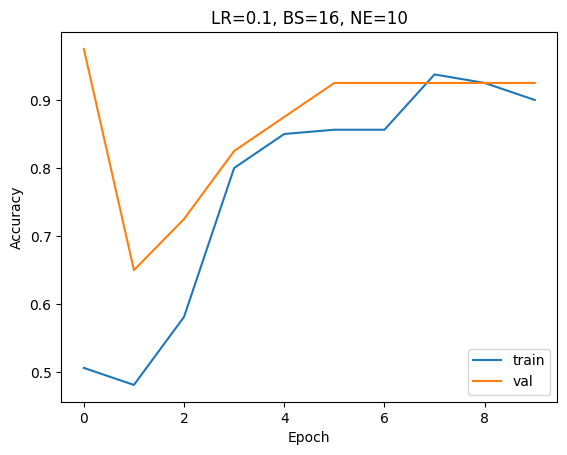

Epoch 1/20
5/5 [==============================] - 2s 68ms/step - loss: 334.0988 - accuracy: 0.5750 - val_loss: 1.2377 - val_accuracy: 0.8750
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 124.0510 - accuracy: 0.5250 - val_loss: 2.6059 - val_accuracy: 0.7000
Epoch 3/20
5/5 [==============================] - 0s 29ms/step - loss: 4.7861 - accuracy: 0.7063 - val_loss: 0.2558 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 2.2717 - accuracy: 0.5938 - val_loss: 0.4511 - val_accuracy: 0.8250
Epoch 5/20
5/5 [==============================] - 0s 25ms/step - loss: 0.9635 - accuracy: 0.8000 - val_loss: 0.4140 - val_accuracy: 0.7500
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 0.5028 - accuracy: 0.8687 - val_loss: 0.4385 - val_accuracy: 0.8250
Epoch 7/20
5/5 [==============================] - 0s 24ms/step - loss: 0.6122 - accuracy: 0.8625 - val_loss: 0.4577 - val_accuracy: 0.8500
Epoch 8/20
5/5 [=======

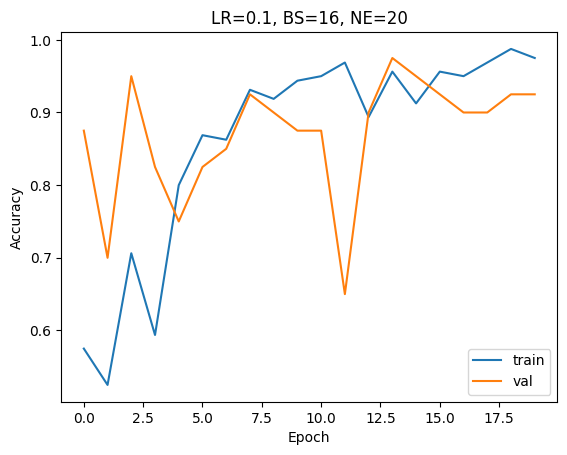

Epoch 1/30
5/5 [==============================] - 2s 69ms/step - loss: 470.9951 - accuracy: 0.4875 - val_loss: 198.5527 - val_accuracy: 0.4500
Epoch 2/30
5/5 [==============================] - 0s 30ms/step - loss: 120.9302 - accuracy: 0.5688 - val_loss: 3.6247 - val_accuracy: 0.5500
Epoch 3/30
5/5 [==============================] - 0s 26ms/step - loss: 24.5067 - accuracy: 0.6062 - val_loss: 3.7711 - val_accuracy: 0.7750
Epoch 4/30
5/5 [==============================] - 0s 25ms/step - loss: 3.0273 - accuracy: 0.7437 - val_loss: 1.8217 - val_accuracy: 0.9000
Epoch 5/30
5/5 [==============================] - 0s 25ms/step - loss: 1.3403 - accuracy: 0.7937 - val_loss: 0.4512 - val_accuracy: 0.8250
Epoch 6/30
5/5 [==============================] - 0s 28ms/step - loss: 0.6483 - accuracy: 0.8062 - val_loss: 0.2981 - val_accuracy: 0.8500
Epoch 7/30
5/5 [==============================] - 0s 27ms/step - loss: 1.0696 - accuracy: 0.7625 - val_loss: 0.3782 - val_accuracy: 0.8250
Epoch 8/30
5/5 [====

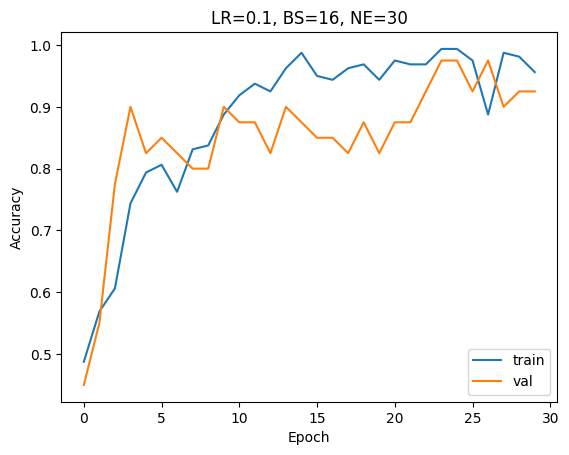

Epoch 1/10
5/5 [==============================] - 2s 65ms/step - loss: 293.0439 - accuracy: 0.5063 - val_loss: 14.3413 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 0s 28ms/step - loss: 35.0833 - accuracy: 0.5500 - val_loss: 2.3801 - val_accuracy: 0.7000
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 4.1499 - accuracy: 0.7563 - val_loss: 0.2731 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.9931 - accuracy: 0.8375 - val_loss: 0.2077 - val_accuracy: 0.9250
Epoch 5/10
5/5 [==============================] - 0s 31ms/step - loss: 0.5498 - accuracy: 0.8750 - val_loss: 0.4504 - val_accuracy: 0.8500
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.6843 - accuracy: 0.8500 - val_loss: 0.3865 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.4417 - accuracy: 0.9125 - val_loss: 0.3692 - val_accuracy: 0.9000
Epoch 8/10
5/5 [=======

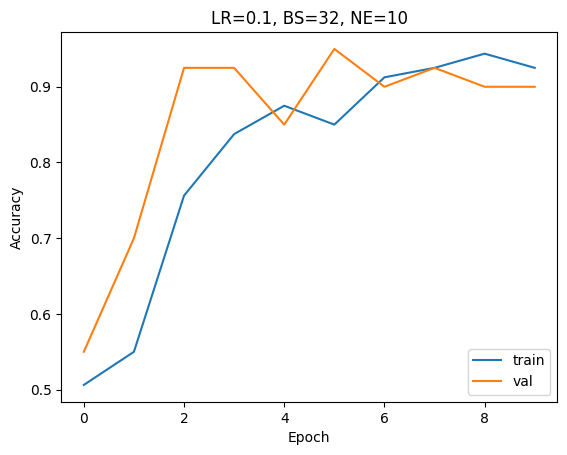

Epoch 1/20
5/5 [==============================] - 2s 64ms/step - loss: 296.5338 - accuracy: 0.5750 - val_loss: 6.4896 - val_accuracy: 0.9000
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 51.7252 - accuracy: 0.6062 - val_loss: 0.4029 - val_accuracy: 0.9500
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 5.3852 - accuracy: 0.6750 - val_loss: 1.6282 - val_accuracy: 0.6750
Epoch 4/20
5/5 [==============================] - 0s 31ms/step - loss: 3.1789 - accuracy: 0.7125 - val_loss: 0.4727 - val_accuracy: 0.8000
Epoch 5/20
5/5 [==============================] - 0s 32ms/step - loss: 1.0041 - accuracy: 0.8438 - val_loss: 0.4835 - val_accuracy: 0.8500
Epoch 6/20
5/5 [==============================] - 0s 29ms/step - loss: 0.5261 - accuracy: 0.8750 - val_loss: 0.3583 - val_accuracy: 0.8500
Epoch 7/20
5/5 [==============================] - 0s 31ms/step - loss: 0.4372 - accuracy: 0.8875 - val_loss: 0.4536 - val_accuracy: 0.9500
Epoch 8/20
5/5 [========

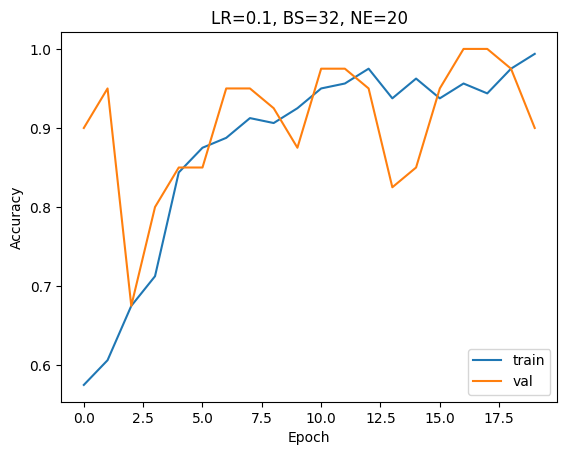

Epoch 1/30
5/5 [==============================] - 2s 68ms/step - loss: 271.0064 - accuracy: 0.4563 - val_loss: 4.3442 - val_accuracy: 0.9500
Epoch 2/30
5/5 [==============================] - 0s 31ms/step - loss: 30.3464 - accuracy: 0.7688 - val_loss: 1.2233 - val_accuracy: 0.9250
Epoch 3/30
5/5 [==============================] - 0s 28ms/step - loss: 10.7570 - accuracy: 0.7312 - val_loss: 2.8631 - val_accuracy: 0.9250
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 6.8683 - accuracy: 0.8188 - val_loss: 2.7364 - val_accuracy: 0.9500
Epoch 5/30
5/5 [==============================] - 0s 24ms/step - loss: 3.2594 - accuracy: 0.8625 - val_loss: 0.7375 - val_accuracy: 0.9250
Epoch 6/30
5/5 [==============================] - 0s 24ms/step - loss: 2.7656 - accuracy: 0.8500 - val_loss: 0.6546 - val_accuracy: 0.9250
Epoch 7/30
5/5 [==============================] - 0s 24ms/step - loss: 1.3442 - accuracy: 0.9187 - val_loss: 0.7235 - val_accuracy: 0.9250
Epoch 8/30
5/5 [=======

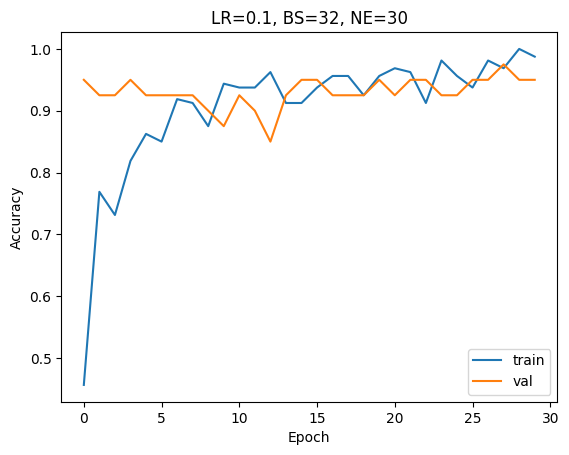

Epoch 1/10
5/5 [==============================] - 3s 73ms/step - loss: 98.7315 - accuracy: 0.5562 - val_loss: 1.8319 - val_accuracy: 0.9000
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 22.2489 - accuracy: 0.6375 - val_loss: 0.9176 - val_accuracy: 0.9250
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 7.1736 - accuracy: 0.6938 - val_loss: 0.2846 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 0s 26ms/step - loss: 1.2003 - accuracy: 0.6438 - val_loss: 0.5689 - val_accuracy: 0.5500
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 1.0221 - accuracy: 0.5312 - val_loss: 0.4685 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 0s 26ms/step - loss: 0.9599 - accuracy: 0.7750 - val_loss: 0.4285 - val_accuracy: 0.8500
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 0.5174 - accuracy: 0.8875 - val_loss: 0.4099 - val_accuracy: 0.8750
Epoch 8/10
5/5 [=========

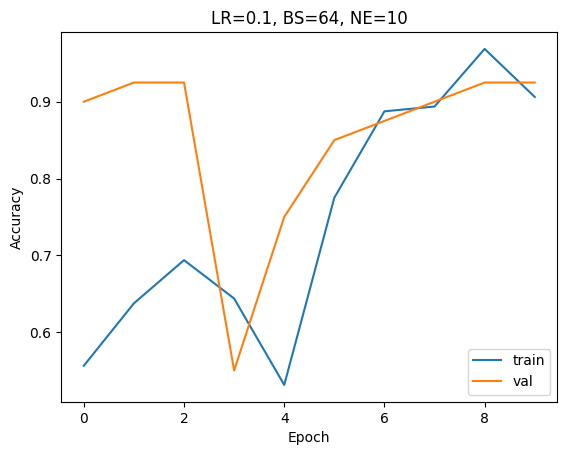

Epoch 1/20
5/5 [==============================] - 3s 67ms/step - loss: 111.5980 - accuracy: 0.5188 - val_loss: 18.7059 - val_accuracy: 0.6500
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 25.4490 - accuracy: 0.5562 - val_loss: 0.4116 - val_accuracy: 0.8000
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 1.8968 - accuracy: 0.7063 - val_loss: 0.3538 - val_accuracy: 0.9000
Epoch 4/20
5/5 [==============================] - 0s 25ms/step - loss: 0.5551 - accuracy: 0.8250 - val_loss: 0.4009 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 0s 28ms/step - loss: 0.6698 - accuracy: 0.8687 - val_loss: 0.3879 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 0.5550 - accuracy: 0.9187 - val_loss: 0.4405 - val_accuracy: 0.8500
Epoch 7/20
5/5 [==============================] - 0s 23ms/step - loss: 0.4152 - accuracy: 0.9375 - val_loss: 0.3566 - val_accuracy: 0.9250
Epoch 8/20
5/5 [=======

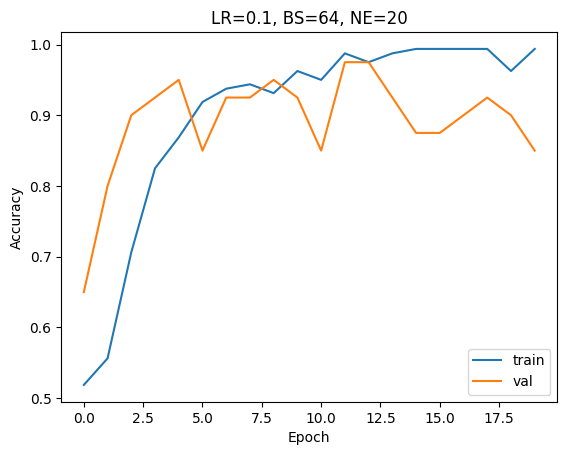

Epoch 1/30
5/5 [==============================] - 2s 69ms/step - loss: 218.4145 - accuracy: 0.5750 - val_loss: 0.5497 - val_accuracy: 0.9250
Epoch 2/30
5/5 [==============================] - 0s 31ms/step - loss: 29.2629 - accuracy: 0.6562 - val_loss: 11.9801 - val_accuracy: 0.7250
Epoch 3/30
5/5 [==============================] - 0s 30ms/step - loss: 10.5403 - accuracy: 0.7875 - val_loss: 1.7591 - val_accuracy: 0.9500
Epoch 4/30
5/5 [==============================] - 0s 25ms/step - loss: 2.0776 - accuracy: 0.8000 - val_loss: 0.2370 - val_accuracy: 0.9500
Epoch 5/30
5/5 [==============================] - 0s 25ms/step - loss: 0.5745 - accuracy: 0.8875 - val_loss: 0.4016 - val_accuracy: 0.8750
Epoch 6/30
5/5 [==============================] - 0s 28ms/step - loss: 1.3304 - accuracy: 0.7688 - val_loss: 0.6393 - val_accuracy: 0.8500
Epoch 7/30
5/5 [==============================] - 0s 27ms/step - loss: 0.4452 - accuracy: 0.8375 - val_loss: 0.4447 - val_accuracy: 0.8500
Epoch 8/30
5/5 [======

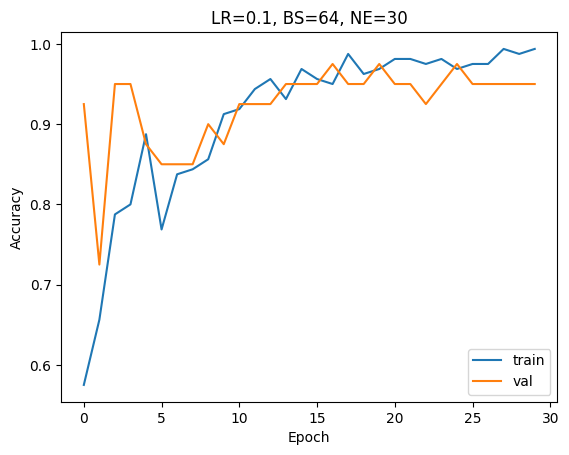

Epoch 1/10
5/5 [==============================] - 3s 87ms/step - loss: 415.5275 - accuracy: 0.5750 - val_loss: 14.7575 - val_accuracy: 0.5500
Epoch 2/10
5/5 [==============================] - 0s 35ms/step - loss: 114.9850 - accuracy: 0.5500 - val_loss: 0.7979 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 0s 35ms/step - loss: 14.4245 - accuracy: 0.6313 - val_loss: 1.0601 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 0s 34ms/step - loss: 1.8052 - accuracy: 0.7750 - val_loss: 0.4568 - val_accuracy: 0.5750
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 0.6967 - accuracy: 0.5250 - val_loss: 0.5124 - val_accuracy: 0.6500
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 0.5196 - accuracy: 0.7312 - val_loss: 0.4244 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 0s 27ms/step - loss: 0.3731 - accuracy: 0.9125 - val_loss: 0.4091 - val_accuracy: 0.8250
Epoch 8/10
5/5 [=====

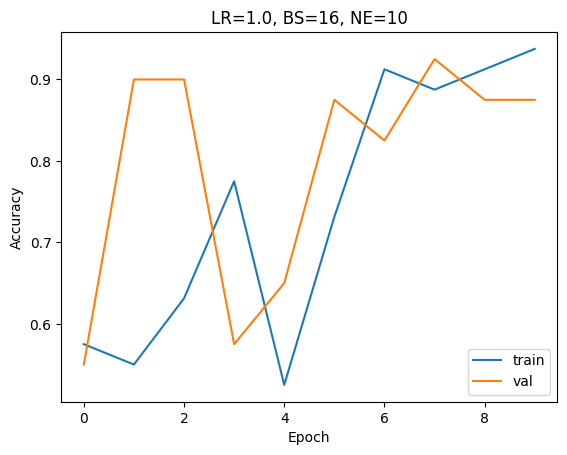

Epoch 1/20
5/5 [==============================] - 2s 65ms/step - loss: 326.5836 - accuracy: 0.4812 - val_loss: 34.6242 - val_accuracy: 0.4500
Epoch 2/20
5/5 [==============================] - 0s 27ms/step - loss: 50.5347 - accuracy: 0.6000 - val_loss: 0.6885 - val_accuracy: 0.6000
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 1.8767 - accuracy: 0.6562 - val_loss: 0.7613 - val_accuracy: 0.7250
Epoch 4/20
5/5 [==============================] - 0s 30ms/step - loss: 0.8823 - accuracy: 0.7063 - val_loss: 0.3853 - val_accuracy: 0.8250
Epoch 5/20
5/5 [==============================] - 0s 24ms/step - loss: 0.5806 - accuracy: 0.8313 - val_loss: 0.4540 - val_accuracy: 0.9250
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 0.5507 - accuracy: 0.8562 - val_loss: 0.4442 - val_accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 0s 26ms/step - loss: 0.4260 - accuracy: 0.9312 - val_loss: 0.3911 - val_accuracy: 0.9000
Epoch 8/20
5/5 [=======

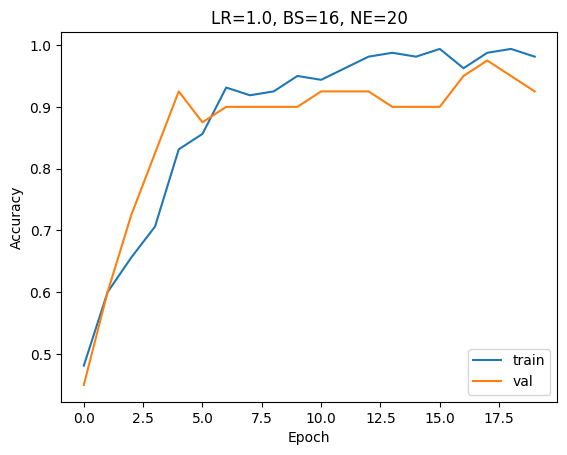

Epoch 1/30
5/5 [==============================] - 3s 92ms/step - loss: 150.6331 - accuracy: 0.5063 - val_loss: 22.6921 - val_accuracy: 0.7000
Epoch 2/30
5/5 [==============================] - 0s 35ms/step - loss: 28.6051 - accuracy: 0.6750 - val_loss: 1.8448 - val_accuracy: 0.8250
Epoch 3/30
5/5 [==============================] - 0s 33ms/step - loss: 6.2873 - accuracy: 0.7312 - val_loss: 2.8759 - val_accuracy: 0.7750
Epoch 4/30
5/5 [==============================] - 0s 43ms/step - loss: 1.2890 - accuracy: 0.7937 - val_loss: 0.2869 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 0s 35ms/step - loss: 0.6200 - accuracy: 0.8687 - val_loss: 2.3712 - val_accuracy: 0.7250
Epoch 6/30
5/5 [==============================] - 0s 32ms/step - loss: 0.8349 - accuracy: 0.7812 - val_loss: 0.2595 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 0s 29ms/step - loss: 0.6163 - accuracy: 0.8313 - val_loss: 0.5980 - val_accuracy: 0.8500
Epoch 8/30
5/5 [=======

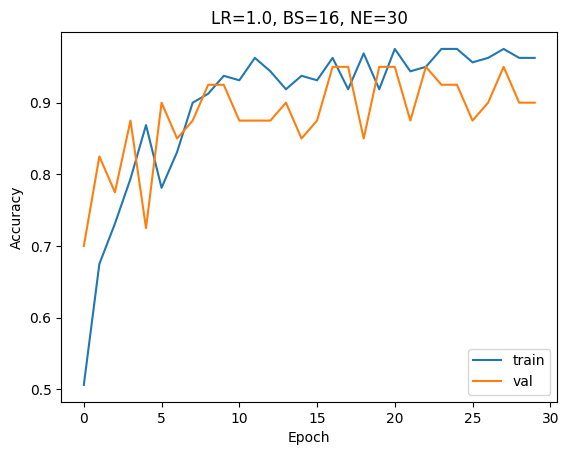

Epoch 1/10
5/5 [==============================] - 2s 67ms/step - loss: 536.0659 - accuracy: 0.5250 - val_loss: 4.0952 - val_accuracy: 0.5750
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 67.7619 - accuracy: 0.5375 - val_loss: 0.1011 - val_accuracy: 0.9500
Epoch 3/10
5/5 [==============================] - 0s 26ms/step - loss: 5.0646 - accuracy: 0.6562 - val_loss: 0.2110 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 0s 25ms/step - loss: 0.8451 - accuracy: 0.6687 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 0.5858 - accuracy: 0.7625 - val_loss: 0.4507 - val_accuracy: 0.8250
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.9737 - accuracy: 0.7563 - val_loss: 0.5993 - val_accuracy: 0.7750
Epoch 7/10
5/5 [==============================] - 0s 24ms/step - loss: 0.6102 - accuracy: 0.8562 - val_loss: 0.5893 - val_accuracy: 0.7750
Epoch 8/10
5/5 [========

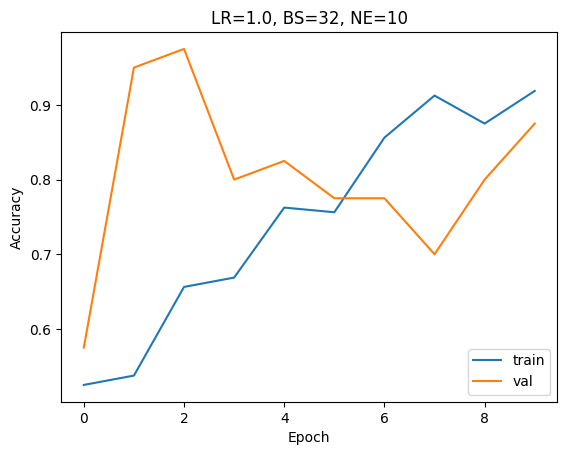

Epoch 1/20
5/5 [==============================] - 2s 65ms/step - loss: 383.9548 - accuracy: 0.5063 - val_loss: 42.8757 - val_accuracy: 0.5250
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 83.8821 - accuracy: 0.6750 - val_loss: 1.2784 - val_accuracy: 0.9250
Epoch 3/20
5/5 [==============================] - 0s 28ms/step - loss: 14.5544 - accuracy: 0.7563 - val_loss: 0.0346 - val_accuracy: 0.9750
Epoch 4/20
5/5 [==============================] - 0s 25ms/step - loss: 6.9545 - accuracy: 0.8375 - val_loss: 6.1419 - val_accuracy: 0.8500
Epoch 5/20
5/5 [==============================] - 0s 25ms/step - loss: 7.2280 - accuracy: 0.8875 - val_loss: 2.3656 - val_accuracy: 0.9250
Epoch 6/20
5/5 [==============================] - 0s 25ms/step - loss: 2.5575 - accuracy: 0.8875 - val_loss: 2.3197 - val_accuracy: 0.9250
Epoch 7/20
5/5 [==============================] - 0s 28ms/step - loss: 0.7103 - accuracy: 0.9375 - val_loss: 0.3295 - val_accuracy: 0.8750
Epoch 8/20
5/5 [======

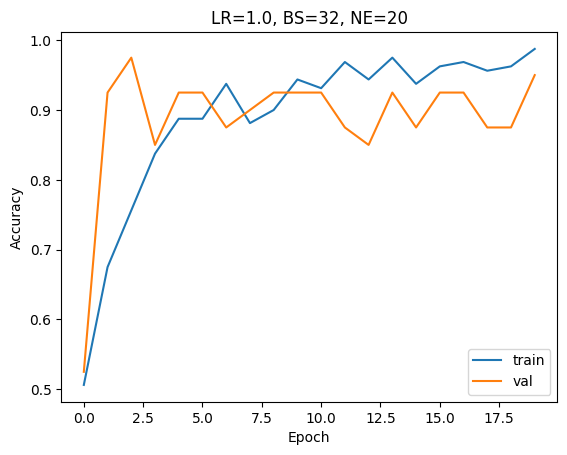

Epoch 1/30
5/5 [==============================] - 2s 68ms/step - loss: 189.9986 - accuracy: 0.4875 - val_loss: 12.0838 - val_accuracy: 0.4750
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 61.6848 - accuracy: 0.5437 - val_loss: 2.8184 - val_accuracy: 0.6500
Epoch 3/30
5/5 [==============================] - 0s 28ms/step - loss: 6.7826 - accuracy: 0.6250 - val_loss: 0.5095 - val_accuracy: 0.7250
Epoch 4/30
5/5 [==============================] - 0s 26ms/step - loss: 1.1787 - accuracy: 0.7437 - val_loss: 0.3605 - val_accuracy: 0.8500
Epoch 5/30
5/5 [==============================] - 0s 27ms/step - loss: 0.5584 - accuracy: 0.8438 - val_loss: 0.4343 - val_accuracy: 0.9250
Epoch 6/30
5/5 [==============================] - 0s 23ms/step - loss: 0.5579 - accuracy: 0.8687 - val_loss: 0.5222 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 0s 25ms/step - loss: 0.4643 - accuracy: 0.9125 - val_loss: 0.3406 - val_accuracy: 0.9500
Epoch 8/30
5/5 [=======

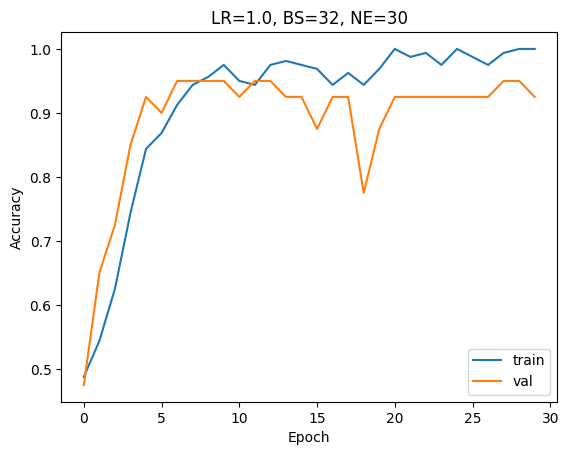

Epoch 1/10
5/5 [==============================] - 3s 70ms/step - loss: 299.5142 - accuracy: 0.4938 - val_loss: 6.5998 - val_accuracy: 0.5750
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 55.4518 - accuracy: 0.5375 - val_loss: 11.6112 - val_accuracy: 0.5500
Epoch 3/10
5/5 [==============================] - 0s 27ms/step - loss: 11.3278 - accuracy: 0.6625 - val_loss: 0.2512 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 0s 29ms/step - loss: 1.0682 - accuracy: 0.7250 - val_loss: 0.8160 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4193 - accuracy: 0.8313 - val_loss: 0.4490 - val_accuracy: 0.9000
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.3288 - accuracy: 0.9438 - val_loss: 0.6562 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 0s 24ms/step - loss: 0.3397 - accuracy: 0.9062 - val_loss: 0.2553 - val_accuracy: 0.8250
Epoch 8/10
5/5 [======

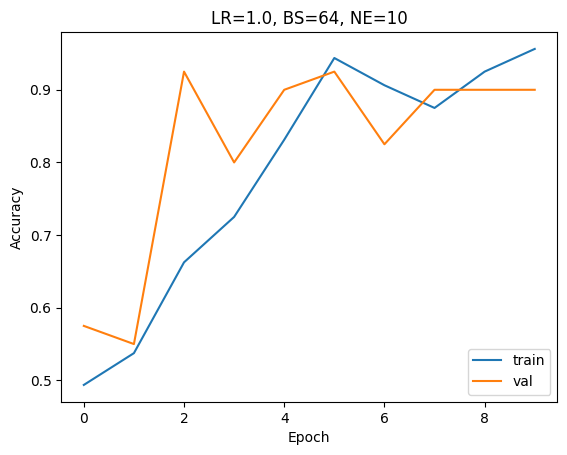

Epoch 1/20
5/5 [==============================] - 3s 88ms/step - loss: 167.4519 - accuracy: 0.4688 - val_loss: 20.1968 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 0s 33ms/step - loss: 35.0028 - accuracy: 0.6062 - val_loss: 0.4590 - val_accuracy: 0.8500
Epoch 3/20
5/5 [==============================] - 0s 37ms/step - loss: 3.1196 - accuracy: 0.8125 - val_loss: 0.4756 - val_accuracy: 0.8750
Epoch 4/20
5/5 [==============================] - 0s 29ms/step - loss: 0.9017 - accuracy: 0.7750 - val_loss: 0.4110 - val_accuracy: 0.8500
Epoch 5/20
5/5 [==============================] - 0s 34ms/step - loss: 0.7847 - accuracy: 0.8625 - val_loss: 0.3985 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 0.5932 - accuracy: 0.8250 - val_loss: 0.3855 - val_accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 0s 40ms/step - loss: 0.4270 - accuracy: 0.8875 - val_loss: 0.3189 - val_accuracy: 0.9250
Epoch 8/20
5/5 [=======

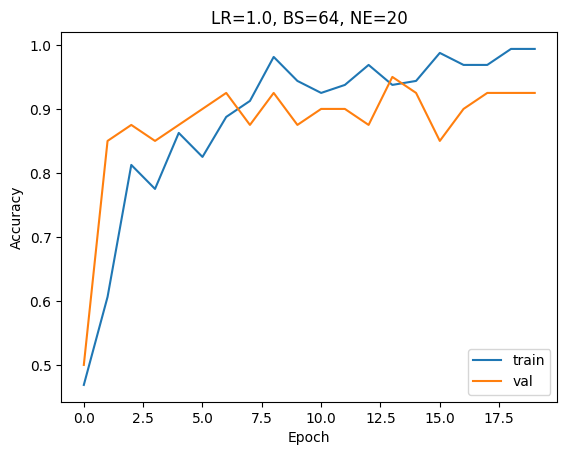

Epoch 1/30
5/5 [==============================] - 2s 69ms/step - loss: 436.9280 - accuracy: 0.4563 - val_loss: 66.5887 - val_accuracy: 0.4500
Epoch 2/30
5/5 [==============================] - 0s 27ms/step - loss: 55.2412 - accuracy: 0.5375 - val_loss: 1.2518 - val_accuracy: 0.9500
Epoch 3/30
5/5 [==============================] - 0s 30ms/step - loss: 5.0352 - accuracy: 0.7563 - val_loss: 0.8601 - val_accuracy: 0.7750
Epoch 4/30
5/5 [==============================] - 0s 28ms/step - loss: 2.4553 - accuracy: 0.7188 - val_loss: 0.2835 - val_accuracy: 0.9000
Epoch 5/30
5/5 [==============================] - 0s 25ms/step - loss: 1.2601 - accuracy: 0.7625 - val_loss: 0.4033 - val_accuracy: 0.9500
Epoch 6/30
5/5 [==============================] - 0s 28ms/step - loss: 0.9923 - accuracy: 0.8687 - val_loss: 0.4983 - val_accuracy: 0.9500
Epoch 7/30
5/5 [==============================] - 0s 27ms/step - loss: 0.5395 - accuracy: 0.8687 - val_loss: 0.3652 - val_accuracy: 0.9250
Epoch 8/30
5/5 [=======

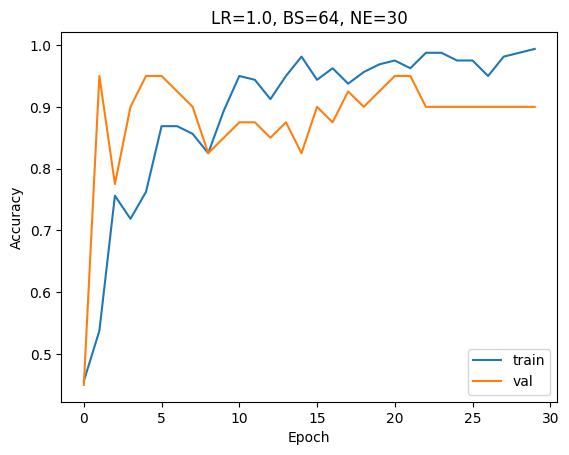

In [17]:
import matplotlib.pyplot as plt

# create lists of different parameter values to test
learning_rates = [0.001, 0.01, 0.1, 1.0]
batch_sizes = [16, 32, 64]
num_epochs = [10, 20, 30]

# loop over parameter combinations and train models
for lr in learning_rates:
    for bs in batch_sizes:
        for ne in num_epochs:
            g_model = create_model(lr, bs)  # create model with specified learning rate and batch size
            # compile the neural network
            g_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            history = g_model.fit(gX_train, gY_train, epochs=ne, validation_split=0.2)
            
            # plot training and validation accuracy over epochs
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title(f"LR={lr}, BS={bs}, NE={ne}")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.legend(['train', 'val'], loc='lower right')
            plt.show()


To test different parameters of the model, we can use a grid search approach or manually change the parameters and evaluate the performance of the model. We can plot graphs to illustrate how different parameters impact the model training by plotting the training and validation accuracy and loss over epochs.

  - *E2* - Testing the models in the dataset. You must implement code routines to test the predictive ability of your models using half of each dataset intended for testing. **The model trained in city A must be tested in city A. The model trained in city B must be tested in city B.** Use the evaluation metrics (accuracy, F1-score, AUC, etc) that are most appropriate for your problem. Plot graphs that illustrate the results obtained for each city (A and B). Plot visual examples of correctly (true positive) and incorrectly (false positive) classified samples. 

[top](#scrollTo=4i5afvUbhmGo)


In [20]:
# Testing the model on the Same City(Edingbruh) test dataset
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
y_pred = E_model.predict(EX_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(EY_test, y_pred)
f1 = f1_score(EY_test, y_pred, average='weighted')
auc = roc_auc_score(EY_test, y_pred, average='weighted', multi_class='ovr')
print(f" Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

7/7 [==============================] - 0s 5ms/step
 Accuracy: 0.9050, F1: 0.9051, AUC: 0.9084


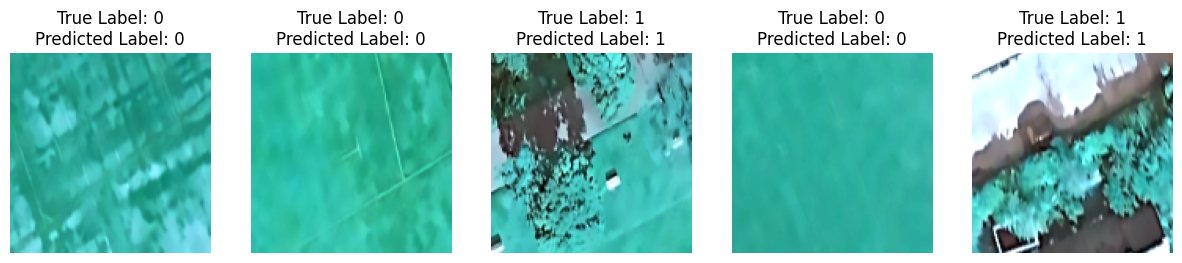

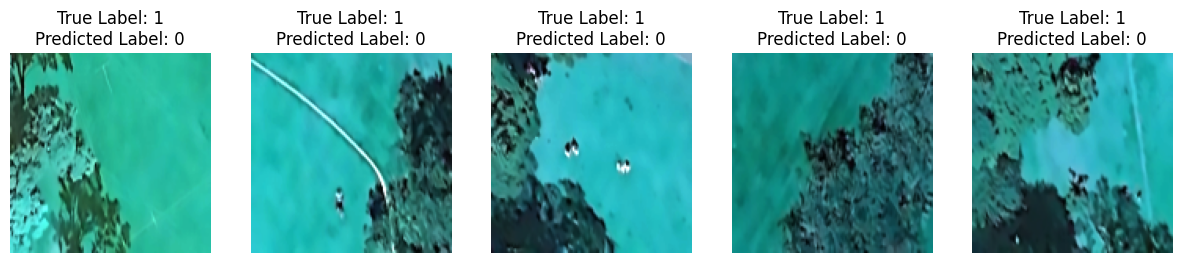

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming EX_test and EY_test are arrays of test examples and their labels, respectively
# Assuming y_pred is an array of predicted labels for EX_test

# Get the indices of correctly and incorrectly classified samples
correct_indices = np.where(y_pred == EY_test)[0]
incorrect_indices = np.where(y_pred != EY_test)[0]

# Plot some examples of correctly classified samples
num_correct_examples = min(5, len(correct_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_correct_examples, figsize=(15, 5))
for i in range(num_correct_examples):
    ax[i].imshow(EX_test[correct_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[correct_indices[i]]}\nPredicted Label: {y_pred[correct_indices[i]]}")
    ax[i].axis('off')

# Plot some examples of incorrectly classified samples
num_incorrect_examples = min(5, len(incorrect_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_incorrect_examples, figsize=(15, 5))
for i in range(num_incorrect_examples):
    ax[i].imshow(EX_test[incorrect_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[incorrect_indices[i]]}\nPredicted Label: {y_pred[incorrect_indices[i]]}")
    ax[i].axis('off')

plt.show()


In [22]:
# Write your codes for E2 here. Create more code cells if needed
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Testing the model on the Same City(glasglow) test dataset

y_pred = g_model.predict(gX_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(gY_test, y_pred)
f1 = f1_score(gY_test, y_pred, average='weighted')
auc = roc_auc_score(gY_test, y_pred, average='weighted', multi_class='ovr')
print(f" Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")



7/7 [==============================] - 0s 5ms/step
 Accuracy: 0.8500, F1: 0.8448, AUC: 0.8387


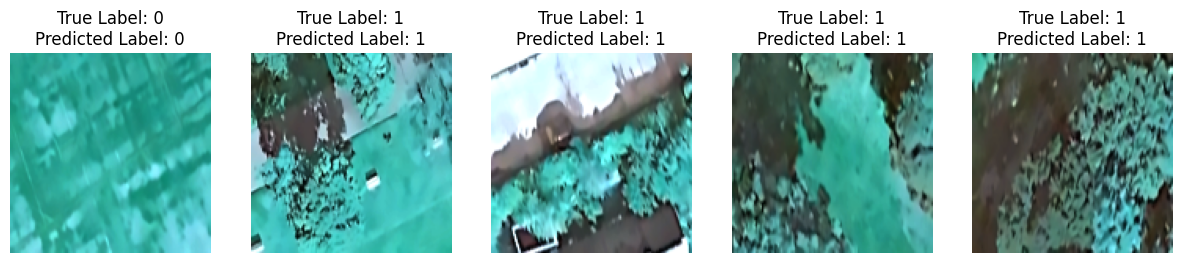

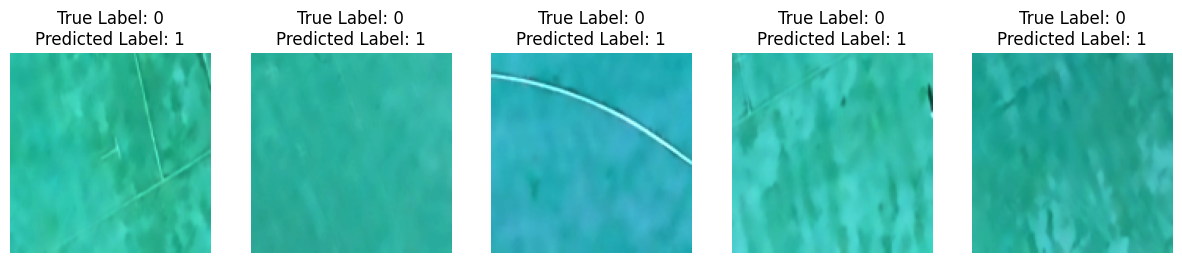

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming EX_test and EY_test are arrays of test examples and their labels, respectively
# Assuming y_pred is an array of predicted labels for EX_test

# Get the indices of correctly and incorrectly classified samples
correct_indices = np.where(y_pred == EY_test)[0]
incorrect_indices = np.where(y_pred != EY_test)[0]

# Plot some examples of correctly classified samples
num_correct_examples = min(5, len(correct_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_correct_examples, figsize=(15, 5))
for i in range(num_correct_examples):
    ax[i].imshow(EX_test[correct_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[correct_indices[i]]}\nPredicted Label: {y_pred[correct_indices[i]]}")
    ax[i].axis('off')

# Plot some examples of incorrectly classified samples
num_incorrect_examples = min(5, len(incorrect_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_incorrect_examples, figsize=(15, 5))
for i in range(num_incorrect_examples):
    ax[i].imshow(EX_test[incorrect_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[incorrect_indices[i]]}\nPredicted Label: {y_pred[incorrect_indices[i]]}")
    ax[i].axis('off')

plt.show()


  - *E3* - Testing the models crossing datasets. Here you must do exactly the same as in *E2*, but now training in one city and testing in the other. **The model trained in city A must be tested in city B. The model trained in city B must be tested in city A.** Use the same metrics and plot the same types of graphs so that results are comparable.

[top](scrollTo=4i5afvUbhmGo)

In [24]:
# Write your codes for E3 here. Create more code cells if needed
# Testing the model with alternate city dataset (glasglow)
y_pred = E_model.predict(gX_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(gY_test, y_pred)
f1 = f1_score(gY_test, y_pred, average='weighted')
auc = roc_auc_score(gY_test, y_pred, average='weighted', multi_class='ovr')
print(f" Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")




7/7 [==============================] - 0s 5ms/step
 Accuracy: 0.7900, F1: 0.7766, AUC: 0.7742


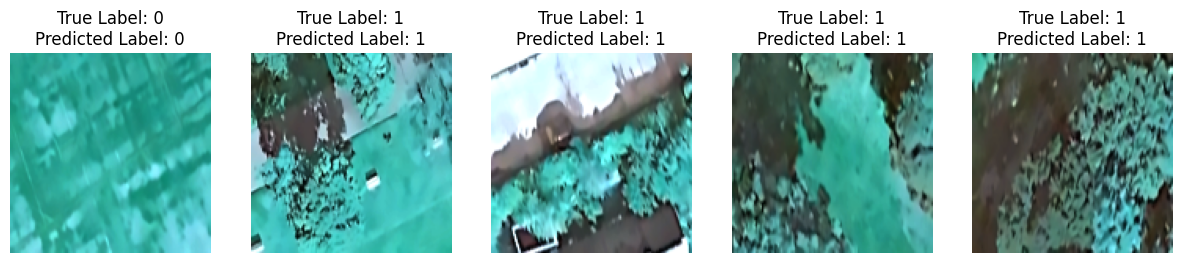

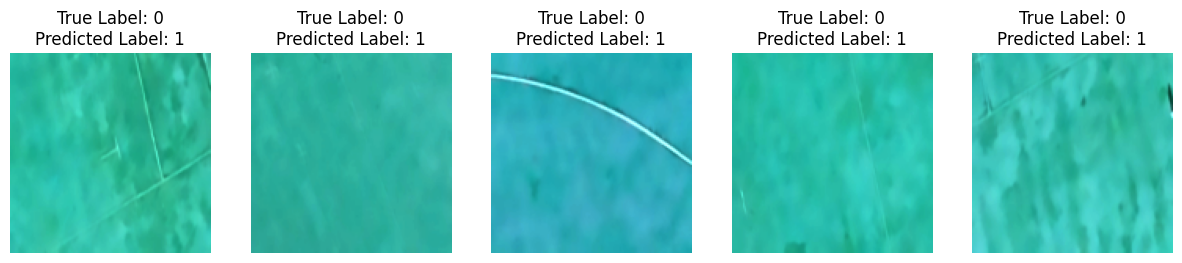

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming EX_test and EY_test are arrays of test examples and their labels, respectively
# Assuming y_pred is an array of predicted labels for EX_test

# Get the indices of correctly and incorrectly classified samples
correct_indices = np.where(y_pred == EY_test)[0]
incorrect_indices = np.where(y_pred != EY_test)[0]

# Plot some examples of correctly classified samples
num_correct_examples = min(5, len(correct_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_correct_examples, figsize=(15, 5))
for i in range(num_correct_examples):
    ax[i].imshow(EX_test[correct_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[correct_indices[i]]}\nPredicted Label: {y_pred[correct_indices[i]]}")
    ax[i].axis('off')

# Plot some examples of incorrectly classified samples
num_incorrect_examples = min(5, len(incorrect_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_incorrect_examples, figsize=(15, 5))
for i in range(num_incorrect_examples):
    ax[i].imshow(EX_test[incorrect_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[incorrect_indices[i]]}\nPredicted Label: {y_pred[incorrect_indices[i]]}")
    ax[i].axis('off')

plt.show()


In [26]:
# Evaluate the model on the testing data
# Testing the model with alternate city dataset(Edingbruh)
y_pred = g_model.predict(EX_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(EY_test, y_pred)
f1 = f1_score(EY_test, y_pred, average='weighted')
auc = roc_auc_score(EY_test, y_pred, average='weighted', multi_class='ovr')
print(f" Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

7/7 [==============================] - 0s 5ms/step
 Accuracy: 0.9250, F1: 0.9251, AUC: 0.9278


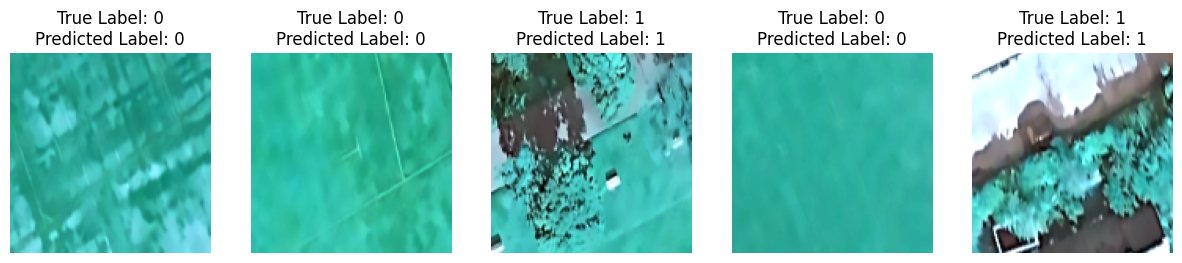

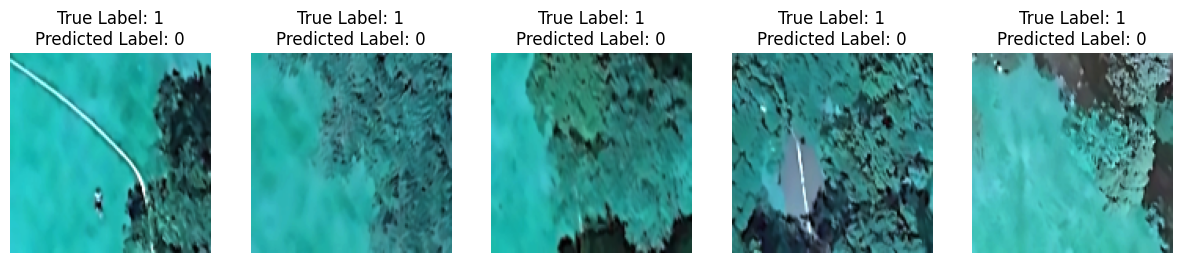

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming EX_test and EY_test are arrays of test examples and their labels, respectively
# Assuming y_pred is an array of predicted labels for EX_test

# Get the indices of correctly and incorrectly classified samples
correct_indices = np.where(y_pred == EY_test)[0]
incorrect_indices = np.where(y_pred != EY_test)[0]

# Plot some examples of correctly classified samples
num_correct_examples = min(5, len(correct_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_correct_examples, figsize=(15, 5))
for i in range(num_correct_examples):
    ax[i].imshow(EX_test[correct_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[correct_indices[i]]}\nPredicted Label: {y_pred[correct_indices[i]]}")
    ax[i].axis('off')

# Plot some examples of incorrectly classified samples
num_incorrect_examples = min(5, len(incorrect_indices))
fig, ax = plt.subplots(nrows=1, ncols=num_incorrect_examples, figsize=(15, 5))
for i in range(num_incorrect_examples):
    ax[i].imshow(EX_test[incorrect_indices[i]])
    ax[i].set_title(f"True Label: {EY_test[incorrect_indices[i]]}\nPredicted Label: {y_pred[incorrect_indices[i]]}")
    ax[i].axis('off')

plt.show()


---

# 7. **Quiz and Report**

Answer the assessment quiz that will be made available on Canvas one week before the final deadline. Make a 2-page latex report using the [IEEE template](https://www.overleaf.com/read/hkfsjjsxmxcn) with a maximum of 1000 words. You can deliver the report in MS Word if you prefer. Your report should contain five sections: introduction, description of the proposed solution with justifications, results (here you can include the same graphs and pictures generated in this jupyter notebook), discussion of the results, and conclusion. Properly cite references to articles, tutorials, and sources used. A pdf version of your report should be made available in the project's github repository under the name "[project name] + _final_report.pdf".


[top](#scrollTo=4i5afvUbhmGo)


---

# 8. **Demonstration**

Some projects (around 10%) will be selected for a mandatory demonstration. During the demo, you will be asked about implementation details and decisions that led to the design of the developed solution.

[top](#scrollTo=4i5afvUbhmGo)